## New scraped dataset


In this notebook we build new dataset using the **web crawling** technique, crawling from  https://www.ooyyo.com. <br>
More specifically, in the chapter 1. we are building the web crawler that will search for automobiles that are produced in 1985 and are selling today in the following contries: USA, Italy, Germany, Poland, Belgium, Netherlands, Latvia, Spain, Switzerland, Czech Republic and France. 
<br>
In the next chapters we are doing EDA and preprocessing. After that few of the maching learning algorithms are applied to the dataset.
<br>
What we want to do with this new dataset is mainly compare the price of different car brands back then in 1985 (in the original dataset) and now (2021). 
<br>
Having in mind that with the web crawling technique we did not get information about every car brand, additional research was made to enrich the dataset manually. We added new rows by hand.

In [1467]:
import numpy as np
import pandas as pd
import statistics
from statistics import mean

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns

from mpl_toolkits import mplot3d
from pylab import rcParams
from sklearn.base import TransformerMixin

import scipy
from scipy import stats
from scipy.stats import iqr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from math import sqrt
from operator import sub
import researchpy as rp

#Preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder, RobustScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.feature_selection import RFECV, RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#Linear Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, BayesianRidge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn_rvm import EMRVR
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from numpy import absolute
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV,ElasticNetCV
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.kernel_ridge import KernelRidge

#Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
#from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import silhouette_visualizer
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from distython import HEOM


import random
import warnings
warnings.filterwarnings("ignore")

## 1. Web Crawler

In [27]:
#Adjusting some options

!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

from selenium import webdriver
import sys

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [121]:
# Poradi strukturata na stranata, ne bese vozmozno da se avtomatizira klikanjeto na potrebnite linkovi

models = ['https://www.ooyyo.com/germany/used-cars-for-sale/c=CDA31D7114D3854F111BFE6FB3A5325C0DA50A7337D3/',
         'https://www.ooyyo.com/united+states/used-cars-for-sale/c=CDA31D7114D3854F111BF66FB3A5325C0DA50A7337D3/',
         'https://www.ooyyo.com/belgium/used-cars-for-sale/c=CDA31D7114D3854F111BE36FB3A5325C0DA50A7337D3/',
         'https://www.ooyyo.com/france/used-cars-for-sale/c=CDA31D7114D3854F111BFB6FB3A5325C0DA50A7337D3/',
         'https://www.ooyyo.com/italy/used-cars-for-sale/c=CDA31D7114D3854F111BF36FB3A5325C0DA50A7337D3/',
         'https://www.ooyyo.com/czech+republic/used-cars-for-sale/c=CDA31D7114D3854F111B976FB3A5325C0DA50A7337D3/',
         'https://www.ooyyo.com/latvia/used-cars-for-sale/c=CDA31D7114D3854F111B826FB3A5325C0DA50A7037D3/',
         'https://www.ooyyo.com/netherlands/used-cars-for-sale/c=CDA31D7114D3854F111BFA6FB3A5325C0DA50A7337D3/',
         'https://www.ooyyo.com/spain/used-cars-for-sale/c=CDA31D7114D3854F111BE56FB3A5325C0DA50A7337D3/',
         'https://www.ooyyo.com/switzerland/used-cars-for-sale/c=CDA31D7114D3854F111BE86FB3A5325C0DA50A7037D3/',
         'https://www.ooyyo.com/poland/used-cars-for-sale/c=CDA31D7114D3854F111B956FB3A5325C0DA50A7037D3/']  

In [122]:
list_of_links = []

In [123]:
# Getting the links of every element (car) of every page

def get_links(): 
  for i in range(1,15):
    list_of_car_info = wd.find_elements_by_class_name('car-card-1') #get info about every car on the current page
    for el in list_of_car_info: 
      list_of_links.append(el.get_property('href'))
    try:
      page = wd.find_element_by_css_selector('div.right-column > div > div:nth-child(8) > div > div > ul > li:last-child > a')
      if page.get_attribute("innerHTML") == '\n&gt;&gt;\n': 
        wd.get(page.get_property('href'))
    except:
      break

#page = wd.find_element_by_css_selector('div.right-column > div > div:nth-child(8) > div > div > ul > li:last-child > a')
#page.get_attribute("innerHTML")

In [124]:
for m in models:
  wd.get(m)
  print(str(models.index(m) + 1) + "th model")
  get_links()

1th model
2th model
3th model
4th model
5th model
6th model
7th model
8th model
9th model
10th model
11th model


In [125]:
# Check for unique links

print(len(list_of_links))
print(len(set(list_of_links)))

1442
876


In [126]:
set_of_unique_links = set(list_of_links)
list_of_unique_links = list(set_of_unique_links)

In [135]:
list_of_links

['https://www.ooyyo.com/germany/c=CDA31D7114D2854F111BFE6FB3A5325C0DA50A7337D3/-5357185607933240436.html/',
 'https://www.ooyyo.com/germany/c=CDA31D7114D2854F111BFE6FB3A5325C0DA50A7337D3/7412637879464530408.html/',
 'https://www.ooyyo.com/germany/c=CDA31D7114D2854F111BFE6FB3A5325C0DA50A7337D3/8227584402728731009.html/',
 'https://www.ooyyo.com/germany/c=CDA31D7114D2854F111BFE6FB3A5325C0DA50A7337D3/752320986355527998.html/',
 'https://www.ooyyo.com/germany/c=CDA31D7114D2854F111BFE6FB3A5325C0DA50A7337D3/5811459055275563663.html/',
 'https://www.ooyyo.com/germany/c=CDA31D7114D2854F111BFE6FB3A5325C0DA50A7337D3/3531324098835313403.html/',
 'https://www.ooyyo.com/germany/c=CDA31D7114D2854F111BFE6FB3A5325C0DA50A7337D3/7423502559099511986.html/',
 'https://www.ooyyo.com/germany/c=CDA31D7114D2854F111BFE6FB3A5325C0DA50A7337D3/-6502631605708558629.html/',
 'https://www.ooyyo.com/germany/c=CDA31D7114D2854F111BFE6FB3A5325C0DA50A7337D3/5103694196321472141.html/',
 'https://www.ooyyo.com/germany/c=CD

In [136]:
all_details=[]

In [137]:
list_of_attributes = ['Price', 'Make', 'Model', 'Trim', 'Body type', 'Mi', 'Year', 'Fuel type', 'Color', 'Power', 'Transmission']
list_of_transmissions = ['Manual', 'Automatic', 'Semi Automatic']
list_of_fuel_types = ['Diesel', 'Petrol', 'Electric', 'Autogas', 'Hybrid', 'Electric']
list_of_body_types = ['Wagon', 'Sedan', 'Convertible', 'Coupe']
list_of_colors = ['Beige', 'Black', 'Blue', 'Bronse', 'Brown', 'Gold', 'Gray', 'Green', 'Orange', 'Red', 'Silver', 'White', 'Yellow', 'Purple']

In [138]:
# Getting the needed attributes into the dataset

def get_attributes(elements, options):
  dictionary = {}
  for el in elements:
    if elements.index(el) + 1 != len(elements):
      next = elements[elements.index(el) + 1]
    else:
      break
    if el == 'Transmission':
      if next in list_of_transmissions:
        dictionary.update({'Transmission' : next})
        continue
      else:
        dictionary.update({'Transmission' : 'N/A'})
        continue
    elif el == 'Fuel type':
      if next in list_of_fuel_types:
        dictionary.update({'Fuel type' : next})
        continue
      else:
        dictionary.update({'Fuel type' : 'N/A'})
        continue
    elif el == 'Body type':
      if next in list_of_body_types:
        dictionary.update({'Body type' : next})
        continue
      else:
        dictionary.update({'Body type' : 'N/A'})
        continue
    elif el == 'Color':
      if next in list_of_colors:
        dictionary.update({'Color' : next})
        continue
      else:
        dictionary.update({'Color' : 'N/A'})
        continue
    elif el in list_of_attributes:
      dictionary.update({el : next})
      continue
    else:
      continue 
  for o in options:
    if o == 'PARK ASSIST':
      dictionary.update({'Park assist' : 1})
      continue
    else:
      dictionary.update({'Park assist' : 0})
    if o == 'SERVICE HISTORY':
      dictionary.update({'Service history' : 1})
      continue
    else:
      dictionary.update({'Service history' : 0})
    if o == 'IMMOBILIZER':
      dictionary.update({'Immobilizer' : 1})
      continue
    else:
      dictionary.update({'Immobilizer' : 0})
    if o == 'CRUISE CONTROL':
      dictionary.update({'Cruise control' : 1})
      continue
    else:
      dictionary.update({'Cruise control' : 0})
  all_details.append(dictionary)

In [143]:
import time
from tqdm import tqdm

for i in tqdm(list_of_unique_links):
  wd.get(i)
  time.sleep(2)
  try:
    ul = wd.find_element_by_css_selector('div:nth-child(2) > ul.basic-info').text
    elements = ul.split('\n')
    ul1 = wd.find_element_by_css_selector('div:nth-child(2) > ul.options').text
    options = ul1.split('\n')
  except:
    options = 'None'
    continue
  get_attributes(elements, options)

 35%|███████████████████████████▊                                                    | 304/876 [19:54<37:27,  3.93s/it]


WebDriverException: Message: unknown error: net::ERR_CONNECTION_CLOSED
  (Session info: headless chrome=91.0.4472.124)


In [157]:
all_details

[{'Price': '17,490 EUR',
  'Make': 'Mercedes Benz',
  'Model': 'Ml-Class',
  'Trim': '350 CDI',
  'Mi': '222,578 km',
  'Year': '1985',
  'Fuel type': 'Diesel',
  'Body type': 'N/A',
  'Color': 'Green',
  'Power': '170 kW (231 HP)',
  'Transmission': 'Automatic',
  'Park assist': 0,
  'Service history': 0,
  'Immobilizer': 0,
  'Cruise control': 0},
 {'Price': '22,800 EUR',
  'Make': 'Mercedes Benz',
  'Model': 'B-Class',
  'Mi': '258,290 km',
  'Year': '1985',
  'Fuel type': 'Petrol',
  'Color': 'Purple',
  'Power': '137 kW (186 HP)',
  'Park assist': 0,
  'Service history': 0,
  'Immobilizer': 0,
  'Cruise control': 0},
 {'Price': '6,950 EUR',
  'Make': 'Mercedes Benz',
  'Model': '200',
  'Mi': '194,875 km',
  'Year': '1985',
  'Fuel type': 'Petrol',
  'Body type': 'Sedan',
  'Color': 'White',
  'Power': '122 kW (166 HP)',
  'Transmission': 'Manual',
  'Park assist': 0,
  'Service history': 0,
  'Immobilizer': 0,
  'Cruise control': 0},
 {'Price': '12,900 EUR',
  'Make': 'Jaguar',
 

In [158]:
# Shuffling the elements in the list of dictionaries

shuffled = random.sample(all_details, len(all_details))
len(shuffled)

134

In [159]:
# Transforming the list into dataframe
df = pd.DataFrame(shuffled)
df

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"27,500 EUR",Mercedes Benz,Sl-Class,600 SL,"151,092 km",1985,Petrol,Convertible,Purple,136 kW (185 HP),Automatic,0,0,0,0
1,"34,900 EUR",Morgan,4-4,NaN,103 km,1985,Petrol,Convertible,Blue,96 kW (131 HP),NaN,0,0,0,0
2,"17,490 EUR",Mercedes Benz,Ml-Class,350 CDI,"222,578 km",1985,Diesel,N/A,Green,170 kW (231 HP),Automatic,0,0,0,0
3,"19,535 EUR (21,500 CHF)",Nissan,Micra,1.0,250 km,1985,Petrol,N/A,Gray,68 kW (92 HP),Automatic,0,0,0,0
4,"11,900 EUR",Toyota,Mr2,1.6,"195,000 km",1985,Petrol,NaN,Red,91 kW (124 HP),Manual,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,"44,900 EUR",Mercedes Benz,Sl-Class,500,"139,000 km",1985,Petrol,Convertible,Blue,180 kW (245 HP),NaN,0,0,0,0
130,"19,990 EUR",Mercedes Benz,S-Class,55 AMG,"126,879 km",1985,Petrol,Sedan,Green,265 kW (360 HP),Automatic,0,0,0,0
131,"18,450 EUR",Mercedes Benz,Sl-Class,380 SL,"77,100 km",1985,Petrol,Convertible,Blue,114 kW (155 HP),Automatic,0,0,0,0
132,"22,000 EUR",Rolls Royce,Silver Spirit,6.8,"133,000 km",1985,Petrol,Sedan,Black,NaN,NaN,0,0,0,0


In [160]:
df['Make'].nunique()

24

Here we will drop all the rows where the car brand (Make) is not present in our first dataset. <br>
We are doing this because at the end we want to make comparison of the prices of the cars according to their car brand.

In [584]:

# Get indexes where name column has values:
indexNames = []
indexNames.append(df[df['Make'] == 'Cadillac'].index)
indexNames.append(df[df['Make'] == 'Ford'].index)
indexNames.append(df[df['Make'] == 'Ac'].index)
indexNames.append(df[df['Make'] == 'Morgan'].index)
indexNames.append(df[df['Make'] == 'Land Rover'].index)
indexNames.append(df[df['Make'] == 'Lancia'].index)
indexNames.append(df[df['Make'] == 'Talbot'].index)
indexNames.append(df[df['Make'] == 'Citroen'].index)
indexNames.append(df[df['Make'] == 'Ford'].index)
indexNames.append(df[df['Make'] == 'Gmc'].index)
indexNames.append(df[df['Make'] == 'Rolls Royce'].index)
indexNames.append(df[df['Make'] == 'Rover'].index)
indexNames.append(df[df['Make'] == 'Trabant'].index)
indexNames.append(df[df['Make'] == 'Opel'].index)
indexNames.append(df[df['Make'] == 'Ferrari'].index)
indexNames.append(df[df['Make'] == 'Škoda'].index)
indexNames.append(df[df['Make'] == 'Seat'].index)
indexNames.append(df[df['Make'] == 'Jeep'].index)



 
# Delete these row indexes from dataFrame
for x in indexNames:
    df.drop(x , inplace=True)


In [585]:
print(df.shape)

(105, 16)


In [586]:
df['Make'].nunique()

12

In [587]:
df = df.droplevel(0).reset_index()

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [588]:
df = df.drop(['level_0', 'index'], axis=1)

KeyError: "['level_0' 'index'] not found in axis"

In [589]:
df

,Unnamed: 0,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,0,"27,500 EUR",Mercedes Benz,Sl-Class,600 SL,"151,092 km",1985,Petrol,Convertible,Purple,136 kW (185 HP),Automatic,0,0,0,0
1,1,"17,490 EUR",Mercedes Benz,Ml-Class,350 CDI,"222,578 km",1985,Diesel,NaN,Green,170 kW (231 HP),Automatic,0,0,0,0
2,2,"19,535 EUR (21,500 CHF)",Nissan,Micra,1.0,250 km,1985,Petrol,NaN,Gray,68 kW (92 HP),Automatic,0,0,0,0
3,3,"11,900 EUR",Toyota,Mr2,1.6,"195,000 km",1985,Petrol,NaN,Red,91 kW (124 HP),Manual,0,0,0,0
4,4,"15,783 EUR (17,500 USD)",Porsche,928,4.7 S,"49,880 mi",1985,Petrol,Coupe,White,NaN,Manual,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,"6,900 EUR",Mercedes Benz,200,200 D,"262,407 km",1985,Diesel,Sedan,Green,53 kW (72 HP),Manual,0,0,0,0
101,101,"6,250 EUR",Mercedes Benz,280,2.8,"270,725 km",1985,Petrol,NaN,White,136 kW (185 HP),Manual,0,0,0,0
102,102,"44,900 EUR",Mercedes Benz,Sl-Class,500,"139,000 km",1985,Petrol,Convertible,Blue,180 kW (245 HP),NaN,0,0,0,0
103,103,"19,990 EUR",Mercedes Benz,S-Class,55 AMG,"126,879 km",1985,Petrol,Sedan,Green,265 kW (360 HP),Automatic,0,0,0,0


In [590]:
df = df.reset_index()

In [595]:
df = df.drop(['Unnamed: 0'], axis=1)

In [596]:
df

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"27,500 EUR",Mercedes Benz,Sl-Class,600 SL,"151,092 km",1985,Petrol,Convertible,Purple,136 kW (185 HP),Automatic,0,0,0,0
1,"17,490 EUR",Mercedes Benz,Ml-Class,350 CDI,"222,578 km",1985,Diesel,NaN,Green,170 kW (231 HP),Automatic,0,0,0,0
2,"19,535 EUR (21,500 CHF)",Nissan,Micra,1.0,250 km,1985,Petrol,NaN,Gray,68 kW (92 HP),Automatic,0,0,0,0
3,"11,900 EUR",Toyota,Mr2,1.6,"195,000 km",1985,Petrol,NaN,Red,91 kW (124 HP),Manual,0,0,0,0
4,"15,783 EUR (17,500 USD)",Porsche,928,4.7 S,"49,880 mi",1985,Petrol,Coupe,White,NaN,Manual,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,"6,900 EUR",Mercedes Benz,200,200 D,"262,407 km",1985,Diesel,Sedan,Green,53 kW (72 HP),Manual,0,0,0,0
101,"6,250 EUR",Mercedes Benz,280,2.8,"270,725 km",1985,Petrol,NaN,White,136 kW (185 HP),Manual,0,0,0,0
102,"44,900 EUR",Mercedes Benz,Sl-Class,500,"139,000 km",1985,Petrol,Convertible,Blue,180 kW (245 HP),NaN,0,0,0,0
103,"19,990 EUR",Mercedes Benz,S-Class,55 AMG,"126,879 km",1985,Petrol,Sedan,Green,265 kW (360 HP),Automatic,0,0,0,0


In [197]:
# Zacuvuvanje na dobieniot dataset

df.to_csv('scraped_dataset.csv')

## 2. Enriching the dataset

As we mentioned in the description of this notebook, in this chapter we are making enrichment of this dataset by adding new data so we could cover all of the car brands and their cars from 1985.

### 2.1 Inspecting which car brands are missing

In [210]:
df.loc[df['Make'] == 'Renault']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control


In [211]:
df.loc[df['Make'] == 'Plymouth']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control


In [536]:
df.loc[df['Make'] == 'Dodge']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control


In [214]:
df.loc[df['Make'] == 'Volvo']


,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control


In [239]:
df.loc[df['Make'] == 'Honda']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control


In [243]:
df.loc[df['Make'] == 'Peugeot']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control


In [244]:
df.loc[df['Make'] == 'Mercury']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control


In [245]:
df.loc[df['Make'] == 'Isuzu']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control


In [528]:
df.loc[df['Make'] == 'Audi']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
56,"12,949 EUR",Audi,A1,1.4 TFSI,"124,649 km",1985,Petrol,N/A,Black,136 kW (185 HP),Automatic,0,0,0,0
59,"499,000 EUR",Audi,Quattro,2.1 Sport,"53,659 km",1985,Petrol,Coupe,Red,NaN,NaN,0,0,0,0


In [533]:
df.loc[df['Make'] == 'Jaguar']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
23,"12,900 EUR",Jaguar,Xj,4.2,"137,114 km",1985,Petrol,Sedan,Red,152 kW (207 HP),Automatic,0,0,0,0
38,"8,650 EUR",Jaguar,Xj,5.3 V12,"112,853 km",1985,Petrol,Sedan,NaN,223 kW (303 HP),Automatic,0,0,0,0


In [535]:
df.loc[df['Make'] == 'Volkswagen']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
25,"22,625 EUR (24,900 CHF)",Volkswagen,Transporter,1.9,"60,000 km",1985,Petrol,N/A,Red,76 kW (103 HP),Manual,0,0,0,0
26,"3,900 EUR",Volkswagen,Golf,NaN,"238,000 km",1985,Petrol,Convertible,Gray,NaN,Manual,0,0,0,0
52,"9,999 EUR",Volkswagen,Golf,NaN,"203,001 km",1985,Petrol,NaN,Gray,84 kW (114 HP),NaN,0,0,0,0


In [235]:
# drop these later in preprocessing
df.loc[df['Make'] == 'Fiat']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
54,"6,000 EUR",Fiat,Ritmo,1.5,"46,919 km",1985,Petrol,Convertible,Silver,60 kW (82 HP),Manual,0,0,0,0
83,"6,000 EUR",Fiat,Ritmo,1.5,"46,919 km",1985,Petrol,Convertible,Silver,60 kW (82 HP),Manual,0,0,0,0


In [238]:
df.loc[df['Make'] == 'Alfa Romeo']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
9,"5,500 EUR",Alfa Romeo,90,2.0,"65,000 km",1985,Petrol,Sedan,White,NaN,Manual,0,0,0,0
39,"9,200 EUR",Alfa Romeo,Alfa 6,2.0,"128,000 km",1985,Petrol,Sedan,Brown,99 kW (135 HP),NaN,0,0,0,0
66,"9,200 EUR",Alfa Romeo,Alfa 6,2.0,"128,000 km",1985,Petrol,Sedan,Brown,99 kW (135 HP),NaN,0,0,0,0
71,"5,500 EUR",Alfa Romeo,90,2.0,"65,000 km",1985,Petrol,Sedan,White,NaN,Manual,0,0,0,0


### 2.2 Adding the data manually

In [541]:
#Mercury
#https://www.classic.com/search/?q=mercury+1985
new_rows = []
new_row1 = {'Price':'11,233 EUR', 'Make':'Mercury', 'Model':'Grand Marquis', 'Trim':'NaN','Mi':'30,577km','Year':1985,'Fuel type':'NaN','Body type':'Sedan','Color':'Gray','Power':'87 kW(118 HP)','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'9,129 EUR', 'Make':'Mercury', 'Model':'Grand Marquis', 'Trim':'NaN','Mi':'30,577km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Black','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row3 = {'Price':'3,511 EUR', 'Make':'Mercury', 'Model':'Grand Marquis', 'Trim':'NaN','Mi':'69,201km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'NaN','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row4 = {'Price':'5,958 EUR', 'Make':'Mercury', 'Model':'Grand Marquis Wagon', 'Trim':'NaN','Mi':'40,064km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Brown','Power':'NaN','Transmission':'NaN','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)
new_rows.append(new_row4)


df_mercury = pd.DataFrame(new_rows)
    
df_mercury


,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"11,233 EUR",Mercury,Grand Marquis,NaN,"30,577km",1985,NaN,Sedan,Gray,87 kW(118 HP),Automatic,0,0,0,0
1,"9,129 EUR",Mercury,Grand Marquis,NaN,"30,577km",1985,Petrol,NaN,Black,NaN,Automatic,0,0,0,0
2,"3,511 EUR",Mercury,Grand Marquis,NaN,"69,201km",1985,Petrol,NaN,Gray,NaN,NaN,0,0,0,0
3,"5,958 EUR",Mercury,Grand Marquis Wagon,NaN,"40,064km",1985,Petrol,NaN,Brown,NaN,NaN,0,0,0,0


In [542]:
#Subaru
#https://cars.mitula.pk/detalle/31082/6140058613395571534/2/1/subaru-1985?search_terms=subaru+1985&page=1&pos=2&t_sec=1&t_or=2&t_pvid=94f0a349-45f2-4480-a6f9-4456c548fdfd&req_sgmt=REVTS1RPUDtTRU87U0VSUDs=
new_rows = []
new_row1 = {'Price':'4,364 EUR', 'Make':'Subaru', 'Model':'Pleo L Limited', 'Trim':'NaN','Mi':'80,467km','Year':1985,'Fuel type':'Petrol','Body type':'Sedan','Color':'White','Power':'NaN','Transmission':'NaN','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'2,641 EUR', 'Make':'Subaru', 'Model':'Justy', 'Trim':'NaN','Mi':'27,4966km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Black','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row3 = {'Price':'4,020 EUR', 'Make':'Subaru', 'Model':'Other', 'Trim':'NaN','Mi':'45,0616km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'NaN','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row4 = {'Price':'2,408 EUR', 'Make':'Subaru', 'Model':'Other', 'Trim':'NaN','Mi':'198,683km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Black','Power':'NaN','Transmission':'NaN','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)
new_rows.append(new_row4)


df_subaru = pd.DataFrame(new_rows)
    
df_subaru

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"4,364 EUR",Subaru,Pleo L Limited,NaN,"80,467km",1985,Petrol,Sedan,White,NaN,NaN,0,0,0,0
1,"2,641 EUR",Subaru,Justy,NaN,"27,4966km",1985,Petrol,NaN,Black,NaN,Automatic,0,0,0,0
2,"4,020 EUR",Subaru,Other,NaN,"45,0616km",1985,Petrol,NaN,White,NaN,NaN,0,0,0,0
3,"2,408 EUR",Subaru,Other,NaN,"198,683km",1985,Petrol,NaN,Black,NaN,NaN,0,0,0,0


In [544]:
#Honda
#https://cars.mitula.pk/detalle/38562/4190129628255522163/3/1/1985?search_terms=1985&page=1&pos=3&t_sec=1&t_or=2&t_pvid=e83b6a72-6c30-4f7f-a075-fbe7c1fa9561&req_sgmt=REVTS1RPUDtTRU87QURfUEFHRTs=
new_rows = []
new_row1 = {'Price':'2,756 EUR', 'Make':'Honda', 'Model':'Civic', 'Trim':'NaN','Mi':'136,794km','Year':1985,'Fuel type':'Petrol','Body type':'Sedan','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'3,100 EUR', 'Make':'Honda', 'Model':'Civic', 'Trim':'NaN','Mi':'241,401km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row3 = {'Price':'2,181 EUR', 'Make':'Honda', 'Model':'Civic', 'Trim':'NaN','Mi':'160,934km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Black','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row4 = {'Price':'5,161 EUR', 'Make':'Honda', 'Model':'Civic Hatchback', 'Trim':'NaN','Mi':'17,881km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Blue','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row5 = {'Price':'6,315 EUR', 'Make':'Honda', 'Model':'Civic Si', 'Trim':'NaN','Mi':'17,702km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Blue','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row6 = {'Price':'5,511 EUR', 'Make':'Honda', 'Model':'Civic', 'Trim':'NaN','Mi':'93,341km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row7 = {'Price':'5,167 EUR', 'Make':'Honda', 'Model':'Civic Si', 'Trim':'NaN','Mi':'804,672km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Blue','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}


new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)
new_rows.append(new_row4)
new_rows.append(new_row5)
new_rows.append(new_row6)
new_rows.append(new_row7)


df_honda = pd.DataFrame(new_rows)
    
df_honda

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"2,756 EUR",Honda,Civic,NaN,"136,794km",1985,Petrol,Sedan,White,NaN,Manual,0,0,0,0
1,"3,100 EUR",Honda,Civic,NaN,"241,401km",1985,Petrol,NaN,White,NaN,Manual,0,0,0,0
2,"2,181 EUR",Honda,Civic,NaN,"160,934km",1985,Petrol,NaN,Black,NaN,Manual,0,0,0,0
3,"5,161 EUR",Honda,Civic Hatchback,NaN,"17,881km",1985,Petrol,NaN,Blue,NaN,Manual,0,0,0,0
4,"6,315 EUR",Honda,Civic Si,NaN,"17,702km",1985,Petrol,NaN,Blue,NaN,Manual,0,0,0,0
5,"5,511 EUR",Honda,Civic,NaN,"93,341km",1985,Petrol,NaN,White,NaN,Manual,0,0,0,0
6,"5,167 EUR",Honda,Civic Si,NaN,"804,672km",1985,Petrol,NaN,Blue,NaN,Manual,0,0,0,0


In [545]:
#Nissan
#https://cars.mitula.pk/detalle/31082/8930049627302190806/14/1/1985?search_terms=1985&page=1&pos=14&t_sec=1&t_or=2&t_pvid=e83b6a72-6c30-4f7f-a075-fbe7c1fa9561&req_sgmt=REVTS1RPUDtTRU87QURfUEFHRTs=
new_rows = []
new_row1 = {'Price':'3,791 EUR', 'Make':'Nissan', 'Model':'Gloria', 'Trim':'NaN','Mi':'241,401km','Year':1985,'Fuel type':'Petrol','Body type':'Sedan','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'4,014 EUR', 'Make':'Nissan', 'Model':'Sunny', 'Trim':'NaN','Mi':'269,549km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row3 = {'Price':'4,014 EUR', 'Make':'Nissan', 'Model':'Sunny', 'Trim':'NaN','Mi':'343,514km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Black','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}



new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)

df_nissan = pd.DataFrame(new_rows)
    
df_nissan

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"3,791 EUR",Nissan,Gloria,NaN,"241,401km",1985,Petrol,Sedan,White,NaN,Manual,0,0,0,0
1,"4,014 EUR",Nissan,Sunny,NaN,"269,549km",1985,Petrol,NaN,White,NaN,Manual,0,0,0,0
2,"4,014 EUR",Nissan,Sunny,NaN,"343,514km",1985,Petrol,NaN,Black,NaN,Manual,0,0,0,0


In [546]:
#BMW
#https://www.ebay.co.uk/b/BMW/31357?Model%2520Year=1985&rt=nc
new_rows = []
new_row1 = {'Price':'15,349 EUR', 'Make':'Bmw', 'Model':'E28 535i M5 Sport', 'Trim':'NaN','Mi':'139,000km','Year':1985,'Fuel type':'Petrol','Body type':'Saloon','Color':'Red','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'10,033 EUR', 'Make':'Bmw', 'Model':'Cabrio', 'Trim':'NaN','Mi':'141,400km','Year':1985,'Fuel type':'Petrol','Body type':'Cabrio','Color':'Red','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row3 = {'Price':'26,517 EUR', 'Make':'Bmw', 'Model':'6 Series', 'Trim':'NaN','Mi':'54,000km','Year':1985,'Fuel type':'Petrol','Body type':'Coupe','Color':'Black','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}



new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)

df_bmw = pd.DataFrame(new_rows)
    
df_bmw

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"15,349 EUR",Bmw,E28 535i M5 Sport,NaN,"139,000km",1985,Petrol,Saloon,Red,NaN,Manual,0,0,0,0
1,"10,033 EUR",Bmw,Cabrio,NaN,"141,400km",1985,Petrol,Cabrio,Red,NaN,Manual,0,0,0,0
2,"26,517 EUR",Bmw,6 Series,NaN,"54,000km",1985,Petrol,Coupe,Black,NaN,Automatic,0,0,0,0


In [547]:
#Isuzu
#https://www.reezocar.com/en/occasion/saab-900+turbo.html
new_rows = []
new_row1 = {'Price':'29,660 EUR', 'Make':'Isuzu', 'Model':'Other', 'Trim':'NaN','Mi':'175,000km','Year':1985,'Fuel type':'Petrol','Body type':'Sedan','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'27,800 EUR', 'Make':'Isuzu', 'Model':'Cabrio', 'Trim':'NaN','Mi':'147,799km','Year':1985,'Fuel type':'Petrol','Body type':'Saloon','Color':'Brown','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}


new_rows.append(new_row1)
new_rows.append(new_row2)

df_isuzu = pd.DataFrame(new_rows)
    
df_isuzu

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"29,660 EUR",Isuzu,Other,NaN,"175,000km",1985,Petrol,Sedan,White,NaN,Manual,0,0,0,0
1,"27,800 EUR",Isuzu,Cabrio,NaN,"147,799km",1985,Petrol,Saloon,Brown,NaN,Manual,0,0,0,0


In [548]:
#mazda
#https://www.beforward.jp/stocklist/client_wishes_id=/description=/make=4/model=/fuel=/fob_price_from=/fob_price_to=/veh_type=/steering=/mission=/mfg_year_from=1985/mfg_month_from=/mfg_year_to=1985/mfg_month_to=/mileage_from=/mileage_to=/cc_from=/cc_to=/showmore=/drive_type=/color=/stock_country=/area=/seats_from=/seats_to=/max_load_min=/max_load_max=/veh_type_sub=/view_cnt=100/page=1/sortkey=/sar=/from_stocklist=1/keyword=/kmode=and/

new_rows = []
new_row1 = {'Price':'21,714 EUR', 'Make':'Mazda', 'Model':'Savanna', 'Trim':'NaN','Mi':'77,717km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'27,800 EUR', 'Make':'Mazda', 'Model':'Savanna', 'Trim':'NaN','Mi':'62,535km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}



new_rows.append(new_row1)
new_rows.append(new_row2)


df_mazda = pd.DataFrame(new_rows)
    
df_mazda


,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"21,714 EUR",Mazda,Savanna,NaN,"77,717km",1985,Petrol,NaN,Gray,NaN,Manual,0,0,0,0
1,"27,800 EUR",Mazda,Savanna,NaN,"62,535km",1985,Petrol,NaN,White,NaN,Manual,0,0,0,0


In [550]:
#volvo
#https://www.beforward.jp/stocklist/client_wishes_id=/description=/make=57/model=/fuel=/fob_price_from=/fob_price_to=/veh_type=/steering=/mission=/mfg_year_from=1985/mfg_month_from=/mfg_year_to=1985/mfg_month_to=/mileage_from=/mileage_to=/cc_from=/cc_to=/showmore=/drive_type=/color=/stock_country=/area=/seats_from=/seats_to=/max_load_min=/max_load_max=/veh_type_sub=/view_cnt=100/page=1/sortkey=/sar=/from_stocklist=1/keyword=/kmode=and/

new_rows = []
new_row1 = {'Price':'8,958 EUR', 'Make':'Volvo', 'Model':'740', 'Trim':'NaN','Mi':'138,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}




new_rows.append(new_row1)


df_volvo = pd.DataFrame(new_rows)
    
df_volvo


,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"8,958 EUR",Volvo,740,NaN,"138,000km",1985,Petrol,NaN,Gray,NaN,Automatic,0,0,0,0


In [551]:
#mitsubishi
#https://www.beforward.jp/stocklist/client_wishes_id=/description=/make=5/model=/fuel=/fob_price_from=/fob_price_to=/veh_type=/steering=/mission=/mfg_year_from=1985/mfg_month_from=/mfg_year_to=1985/mfg_month_to=/mileage_from=/mileage_to=/cc_from=/cc_to=/showmore=/drive_type=/color=/stock_country=/area=/seats_from=/seats_to=/max_load_min=/max_load_max=/veh_type_sub=/view_cnt=25/page=1/sortkey=n/sar=/from_stocklist=1/keyword=/kmode=and/
new_rows = []
new_row1 = {'Price':'7,272 EUR', 'Make':'Mitsubishi', 'Model':'Canter', 'Trim':'NaN','Mi':'37,000km','Year':1985,'Fuel type':'Diesel','Body type':'Truck','Color':'Blue','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row2 = {'Price':'8,399 EUR', 'Make':'Mitsubishi', 'Model':'Fighter', 'Trim':'NaN','Mi':'186,000km','Year':1985,'Fuel type':'Diesel','Body type':'Truck','Color':'Green','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row3 = {'Price':'8,958 EUR', 'Make':'Mitsubishi', 'Model':'Canter', 'Trim':'NaN','Mi':'41,320km','Year':1985,'Fuel type':'Diesel','Body type':'Truck','Color':'Blue','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}




new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)


df_mitsubishi = pd.DataFrame(new_rows)
    
df_mitsubishi


,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"7,272 EUR",Mitsubishi,Canter,NaN,"37,000km",1985,Diesel,Truck,Blue,NaN,Manual,0,0,0,0
1,"8,399 EUR",Mitsubishi,Fighter,NaN,"186,000km",1985,Diesel,Truck,Green,NaN,Manual,0,0,0,0
2,"8,958 EUR",Mitsubishi,Canter,NaN,"41,320km",1985,Diesel,Truck,Blue,NaN,Manual,0,0,0,0


In [552]:
#chevrolet
#https://www.reezocar.com/en/occasion/chevrolet+1985.html
new_rows = []
new_row1 = {'Price':'22,000 EUR', 'Make':'Chevrolet', 'Model':'Autres', 'Trim':'NaN','Mi':'281,635km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'40,000 EUR', 'Make':'Chevrolet', 'Model':'K30', 'Trim':'NaN','Mi':'5,000km','Year':1985,'Fuel type':'Diesel','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row3 = {'Price':'2,750 EUR', 'Make':'Chevrolet', 'Model':'Caprice', 'Trim':'NaN','Mi':'999,999km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row4 = {'Price':'14,000 EUR', 'Make':'Chevrolet', 'Model':'Autres', 'Trim':'NaN','Mi':'185,075km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Black','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row5 = {'Price':'14,000 EUR', 'Make':'Chevrolet', 'Model':'Autres', 'Trim':'NaN','Mi':'185,075km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Black','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row6 = {'Price':'16,900 EUR', 'Make':'Chevrolet', 'Model':'Canaro', 'Trim':'NaN','Mi':'109,752km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row7 = {'Price':'26,800 EUR', 'Make':'Chevrolet', 'Model':'El Camino', 'Trim':'NaN','Mi':'43,249km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Black','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row8 = {'Price':'16,900 EUR', 'Make':'Chevrolet', 'Model':'Camaro', 'Trim':'NaN','Mi':'109,752km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Black','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row9 = {'Price':'56,140 EUR', 'Make':'Chevrolet', 'Model':'Chevy', 'Trim':'NaN','Mi':'14,026km','Year':1985,'Fuel type':'Petrol','Body type':'Van','Color':'Blue','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row10 = {'Price':'14,950 EUR', 'Make':'Chevrolet', 'Model':'Chevy', 'Trim':'NaN','Mi':'115,000km','Year':1985,'Fuel type':'Petrol','Body type':'Van','Color':'Blue','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row11 = {'Price':'19,999 EUR', 'Make':'Chevrolet', 'Model':'Caprice', 'Trim':'NaN','Mi':'99,999km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Blue','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row12 = {'Price':'7,500 EUR', 'Make':'Chevrolet', 'Model':'Blazer', 'Trim':'NaN','Mi':'134,000km','Year':1985,'Fuel type':'Diesel','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)
new_rows.append(new_row4)
new_rows.append(new_row5)
new_rows.append(new_row6)
new_rows.append(new_row7)
new_rows.append(new_row8)
new_rows.append(new_row9)
new_rows.append(new_row10)
new_rows.append(new_row11)
new_rows.append(new_row12)




df_chevrolet = pd.DataFrame(new_rows)
    
df_chevrolet

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"22,000 EUR",Chevrolet,Autres,NaN,"281,635km",1985,Petrol,NaN,Gray,NaN,Automatic,0,0,0,0
1,"40,000 EUR",Chevrolet,K30,NaN,"5,000km",1985,Diesel,NaN,Gray,NaN,Manual,0,0,0,0
2,"2,750 EUR",Chevrolet,Caprice,NaN,"999,999km",1985,Petrol,NaN,White,NaN,Automatic,0,0,0,0
3,"14,000 EUR",Chevrolet,Autres,NaN,"185,075km",1985,Petrol,NaN,Black,NaN,Manual,0,0,0,0
4,"14,000 EUR",Chevrolet,Autres,NaN,"185,075km",1985,Petrol,NaN,Black,NaN,Manual,0,0,0,0
5,"16,900 EUR",Chevrolet,Canaro,NaN,"109,752km",1985,Petrol,NaN,White,NaN,Manual,0,0,0,0
6,"26,800 EUR",Chevrolet,El Camino,NaN,"43,249km",1985,Petrol,NaN,Black,NaN,Automatic,0,0,0,0
7,"16,900 EUR",Chevrolet,Camaro,NaN,"109,752km",1985,Petrol,NaN,Black,NaN,Manual,0,0,0,0
8,"56,140 EUR",Chevrolet,Chevy,NaN,"14,026km",1985,Petrol,Van,Blue,NaN,Automatic,0,0,0,0
9,"14,950 EUR",Chevrolet,Chevy,NaN,"115,000km",1985,Petrol,Van,Blue,NaN,Automatic,0,0,0,0


In [553]:
#Saab
#https://www.reezocar.com/en/occasion/saab-900+turbo.html
new_rows = []
new_row1 = {'Price':'20,000 EUR', 'Make':'Saab', 'Model':'E28 535i M5 Sport', 'Trim':'NaN','Mi':'223,000km','Year':1985,'Fuel type':'Petrol','Body type':'Coupe','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'27,800 EUR', 'Make':'Saab', 'Model':'Cabrio', 'Trim':'NaN','Mi':'147,799km','Year':1985,'Fuel type':'Petrol','Body type':'Saloon','Color':'Brown','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row3 = {'Price':'6,950 EUR', 'Make':'Saab', 'Model':'900', 'Trim':'NaN','Mi':'225,500km','Year':1985,'Fuel type':'Petrol','Body type':'Classic','Color':'Red','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row4 = {'Price':'8,500 EUR', 'Make':'Saab', 'Model':'900', 'Trim':'NaN','Mi':'256,300km','Year':1985,'Fuel type':'Petrol','Body type':'Small','Color':'Black','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}


new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)
new_rows.append(new_row4)

df_saab = pd.DataFrame(new_rows)
    
df_saab

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"20,000 EUR",Saab,E28 535i M5 Sport,NaN,"223,000km",1985,Petrol,Coupe,White,NaN,Manual,0,0,0,0
1,"27,800 EUR",Saab,Cabrio,NaN,"147,799km",1985,Petrol,Saloon,Brown,NaN,Manual,0,0,0,0
2,"6,950 EUR",Saab,900,NaN,"225,500km",1985,Petrol,Classic,Red,NaN,Automatic,0,0,0,0
3,"8,500 EUR",Saab,900,NaN,"256,300km",1985,Petrol,Small,Black,NaN,Automatic,0,0,0,0


In [554]:
#Renault
#https://www.reezocar.com/en/occasion/1985+renault.html
new_rows = []
new_row1 = {'Price':'3,800 EUR', 'Make':'Renault', 'Model':'R4', 'Trim':'NaN','Mi':'98,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Red','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'10,000 EUR', 'Make':'Renault', 'Model':'Espace', 'Trim':'NaN','Mi':'166,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row3 = {'Price':'2,500 EUR', 'Make':'Renault', 'Model':'R4', 'Trim':'NaN','Mi':'100,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Blue','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row4 = {'Price':'161,000 EUR', 'Make':'Renault', 'Model':'R5', 'Trim':'NaN','Mi':'60,565km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Black','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row5 = {'Price':'1,950 EUR', 'Make':'Renault', 'Model':'R4', 'Trim':'NaN','Mi':'130,743km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Blue','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row6 = {'Price':'4,850 EUR', 'Make':'Renault', 'Model':'R4', 'Trim':'NaN','Mi':'185,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row7 = {'Price':'9,600 EUR', 'Make':'Renault', 'Model':'R4', 'Trim':'NaN','Mi':'88,600KM','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Blue','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row8 = {'Price':'3,700 EUR', 'Make':'Renault', 'Model':'R4', 'Trim':'NaN','Mi':'1,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row9 = {'Price':'3,500 EUR', 'Make':'Renault', 'Model':'R4', 'Trim':'NaN','Mi':'129,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Yellow','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row10 = {'Price':'2,150 EUR', 'Make':'Renault', 'Model':'R4', 'Trim':'NaN','Mi':'130,743km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Blue','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}


new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)
new_rows.append(new_row4)
new_rows.append(new_row5)
new_rows.append(new_row6)
new_rows.append(new_row7)
new_rows.append(new_row8)
new_rows.append(new_row9)
new_rows.append(new_row10)




df_renault = pd.DataFrame(new_rows)
    
df_renault

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"3,800 EUR",Renault,R4,NaN,"98,000km",1985,Petrol,NaN,Red,NaN,Manual,0,0,0,0
1,"10,000 EUR",Renault,Espace,NaN,"166,000km",1985,Petrol,NaN,Gray,NaN,Manual,0,0,0,0
2,"2,500 EUR",Renault,R4,NaN,"100,000km",1985,Petrol,NaN,Blue,NaN,Manual,0,0,0,0
3,"161,000 EUR",Renault,R5,NaN,"60,565km",1985,Petrol,NaN,Black,NaN,Manual,0,0,0,0
4,"1,950 EUR",Renault,R4,NaN,"130,743km",1985,Petrol,NaN,Blue,NaN,Manual,0,0,0,0
5,"4,850 EUR",Renault,R4,NaN,"185,000km",1985,Petrol,NaN,White,NaN,Manual,0,0,0,0
6,"9,600 EUR",Renault,R4,NaN,"88,600KM",1985,Petrol,NaN,Blue,NaN,Manual,0,0,0,0
7,"3,700 EUR",Renault,R4,NaN,"1,000km",1985,Petrol,NaN,White,NaN,Manual,0,0,0,0
8,"3,500 EUR",Renault,R4,NaN,"129,000km",1985,Petrol,NaN,Yellow,NaN,Manual,0,0,0,0
9,"2,150 EUR",Renault,R4,NaN,"130,743km",1985,Petrol,NaN,Blue,NaN,Manual,0,0,0,0


In [555]:
#Peugeot
#https://www.reezocar.com/en/occasion/peugeot-505.html


new_rows = []
new_row1 = {'Price':'1,099 EUR', 'Make':'Peugeot', 'Model':'505', 'Trim':'NaN','Mi':'197,500km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row2 = {'Price':'4,999 EUR', 'Make':'Peugeot', 'Model':'505', 'Trim':'NaN','Mi':'119,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row3 = {'Price':'11,499 EUR', 'Make':'Peugeot', 'Model':'505', 'Trim':'NaN','Mi':'112,600km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row4 = {'Price':'6,250 EUR', 'Make':'Peugeot', 'Model':'505', 'Trim':'NaN','Mi':'189,480km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row5 = {'Price':'15,000 EUR', 'Make':'Peugeot', 'Model':'505', 'Trim':'NaN','Mi':'75,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Blue','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row6 = {'Price':'3,000 EUR', 'Make':'Peugeot', 'Model':'505', 'Trim':'NaN','Mi':'230,000km','Year':1985,'Fuel type':'Diesel','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row7 = {'Price':'1,800 EUR', 'Make':'Peugeot', 'Model':'505', 'Trim':'NaN','Mi':'270,000km','Year':1985,'Fuel type':'Diesel','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row8 = {'Price':'1,700 EUR', 'Make':'Peugeot', 'Model':'505', 'Trim':'NaN','Mi':'119,000km','Year':1985,'Fuel type':'Diesel','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row9 = {'Price':'1,500 EUR', 'Make':'Peugeot', 'Model':'505', 'Trim':'NaN','Mi':'158,000km','Year':1985,'Fuel type':'Diesel','Body type':'NaN','Color':'Green','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row10 = {'Price':'4,990 EUR', 'Make':'Peugeot', 'Model':'505', 'Trim':'NaN','Mi':'152,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row11 = {'Price':'2,400 EUR', 'Make':'Peugeot', 'Model':'505', 'Trim':'NaN','Mi':'299,012km','Year':1985,'Fuel type':'Diesel','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}



new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)
new_rows.append(new_row4)
new_rows.append(new_row5)
new_rows.append(new_row6)
new_rows.append(new_row7)
new_rows.append(new_row8)
new_rows.append(new_row9)
new_rows.append(new_row10)
new_rows.append(new_row11)


df_peugeot = pd.DataFrame(new_rows)
    
df_peugeot

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"1,099 EUR",Peugeot,505,NaN,"197,500km",1985,Petrol,NaN,Gray,NaN,Manual,0,0,0,0
1,"4,999 EUR",Peugeot,505,NaN,"119,000km",1985,Petrol,NaN,Gray,NaN,Automatic,0,0,0,0
2,"11,499 EUR",Peugeot,505,NaN,"112,600km",1985,Petrol,NaN,Gray,NaN,Manual,0,0,0,0
3,"6,250 EUR",Peugeot,505,NaN,"189,480km",1985,Petrol,NaN,Gray,NaN,Manual,0,0,0,0
4,"15,000 EUR",Peugeot,505,NaN,"75,000km",1985,Petrol,NaN,Blue,NaN,Automatic,0,0,0,0
5,"3,000 EUR",Peugeot,505,NaN,"230,000km",1985,Diesel,NaN,White,NaN,Manual,0,0,0,0
6,"1,800 EUR",Peugeot,505,NaN,"270,000km",1985,Diesel,NaN,White,NaN,Manual,0,0,0,0
7,"1,700 EUR",Peugeot,505,NaN,"119,000km",1985,Diesel,NaN,White,NaN,Manual,0,0,0,0
8,"1,500 EUR",Peugeot,505,NaN,"158,000km",1985,Diesel,NaN,Green,NaN,Manual,0,0,0,0
9,"4,990 EUR",Peugeot,505,NaN,"152,000km",1985,Petrol,NaN,Gray,NaN,Automatic,0,0,0,0


In [556]:
#Jaguar
#https://www.reezocar.com/en/occasion/jaguar+1985.html


new_rows = []
new_row1 = {'Price':'6,600 EUR', 'Make':'Jaguar', 'Model':'Xjs', 'Trim':'NaN','Mi':'57,003km','Year':1985,'Fuel type':'Petrol','Body type':'Convertible','Color':'Black','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'14,500 EUR', 'Make':'Jaguar', 'Model':'Xj', 'Trim':'NaN','Mi':'155,500km','Year':1985,'Fuel type':'Petrol','Body type':'Sedan','Color':'Black','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row3 = {'Price':'29,950 EUR', 'Make':'Jaguar', 'Model':'Xj', 'Trim':'NaN','Mi':'33,521km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Red','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row4 = {'Price':'21,950 EUR', 'Make':'Jaguar', 'Model':'Xjs', 'Trim':'NaN','Mi':'127,800km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row5 = {'Price':'10,800 EUR', 'Make':'Jaguar', 'Model':'Xj', 'Trim':'NaN','Mi':'71,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Black','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row6 = {'Price':'30,950 EUR', 'Make':'Jaguar', 'Model':'Xjs', 'Trim':'NaN','Mi':'127,800km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row7 = {'Price':'7,450 EUR', 'Make':'Jaguar', 'Model':'Xj', 'Trim':'NaN','Mi':'98,897km','Year':1985,'Fuel type':'Diesel','Body type':'NaN','Color':'Gray','Power':'NaN','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}


new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)
new_rows.append(new_row4)
new_rows.append(new_row5)
new_rows.append(new_row6)
new_rows.append(new_row7)



df_jaguar = pd.DataFrame(new_rows)
    
df_jaguar

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"6,600 EUR",Jaguar,Xjs,NaN,"57,003km",1985,Petrol,Convertible,Black,NaN,Automatic,0,0,0,0
1,"14,500 EUR",Jaguar,Xj,NaN,"155,500km",1985,Petrol,Sedan,Black,NaN,Automatic,0,0,0,0
2,"29,950 EUR",Jaguar,Xj,NaN,"33,521km",1985,Petrol,NaN,Red,NaN,Automatic,0,0,0,0
3,"21,950 EUR",Jaguar,Xjs,NaN,"127,800km",1985,Petrol,NaN,White,NaN,Manual,0,0,0,0
4,"10,800 EUR",Jaguar,Xj,NaN,"71,000km",1985,Petrol,NaN,Black,NaN,Manual,0,0,0,0
5,"30,950 EUR",Jaguar,Xjs,NaN,"127,800km",1985,Petrol,NaN,White,NaN,Automatic,0,0,0,0
6,"7,450 EUR",Jaguar,Xj,NaN,"98,897km",1985,Diesel,NaN,Gray,NaN,Automatic,0,0,0,0


In [557]:
#Plymouth
#https://www.carsforsale.com/1985-plymouth-gran-fury-for-sale-C105834?__cf_chl_captcha_tk__=pmd_815ec68e2aface1e03d3290589670f05692242b2-1629040460-0-gqNtZGzNAyKjcnBszQuO
#https://www.pinterest.com/pin/422634746262917054/

new_rows = []
new_row1 = {'Price':'6,781 EUR', 'Make':'Plymouth', 'Model':'Gran Fury', 'Trim':'NaN','Mi':'64,373km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Red','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'1,356 EUR', 'Make':'Plymouth', 'Model':'Caravelle Turbo', 'Trim':'NaN','Mi':'104,382km','Year':1985,'Fuel type':'Petrol','Body type':'Sedan','Color':'Gray','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}


new_rows.append(new_row1)
new_rows.append(new_row2)

df_plymouth = pd.DataFrame(new_rows)
    
df_plymouth


,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"6,781 EUR",Plymouth,Gran Fury,NaN,"64,373km",1985,Petrol,NaN,Red,NaN,Manual,0,0,0,0
1,"1,356 EUR",Plymouth,Caravelle Turbo,NaN,"104,382km",1985,Petrol,Sedan,Gray,NaN,Manual,0,0,0,0


In [558]:
#Audi
#https://www.autoscout24.com/lst/audi/80?sort=standard&desc=0&ustate=N%2CU&size=20&page=1&fregto=1985&fregfrom=1985&atype=C&recommended_sorting_based_id=08d8f9c0-b467-e65f-e053-0100007f4f84&

new_rows = []
new_row1 = {'Price':'4,950 EUR', 'Make':'Audi', 'Model':'80', 'Trim':'NaN','Mi':'123,628km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Pink','Power':'55 kW (75 HP)','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'1,500 EUR', 'Make':'Audi', 'Model':'80', 'Trim':'NaN','Mi':'230,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Gray','Power':'55 kW (75 HP)','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row3 = {'Price':'1,750 EUR', 'Make':'Audi', 'Model':'80', 'Trim':'NaN','Mi':'123,628km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Red','Power':'55 kW (75 HP)','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row4 = {'Price':'2,995 EUR', 'Make':'Audi', 'Model':'80', 'Trim':'NaN','Mi':'182,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Brown','Power':'55 kW (75 HP)','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row5 = {'Price':'3,700 EUR', 'Make':'Audi', 'Model':'80', 'Trim':'NaN','Mi':'109,000km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Black','Power':'66 kW (90 HP)','Transmission':'Automatic','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}
new_row6 = {'Price':'4,500 EUR', 'Make':'Audi', 'Model':'80', 'Trim':'NaN','Mi':'88,336km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Gray','Power':'66 kW (90 HP)','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}


new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)
new_rows.append(new_row4)
new_rows.append(new_row5)
new_rows.append(new_row6)





df_audi = pd.DataFrame(new_rows)
    
df_audi

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"4,950 EUR",Audi,80,NaN,"123,628km",1985,Petrol,NaN,Pink,55 kW (75 HP),Manual,0,0,0,0
1,"1,500 EUR",Audi,80,NaN,"230,000km",1985,Petrol,NaN,Gray,55 kW (75 HP),Manual,0,0,0,0
2,"1,750 EUR",Audi,80,NaN,"123,628km",1985,Petrol,NaN,Red,55 kW (75 HP),Manual,0,0,0,0
3,"2,995 EUR",Audi,80,NaN,"182,000km",1985,Petrol,NaN,Brown,55 kW (75 HP),Manual,0,0,0,0
4,"3,700 EUR",Audi,80,NaN,"109,000km",1985,Petrol,NaN,Black,66 kW (90 HP),Automatic,0,0,0,0
5,"4,500 EUR",Audi,80,NaN,"88,336km",1985,Petrol,NaN,Gray,66 kW (90 HP),Manual,0,0,0,0


In [559]:
#Dodge
#https://www.carsforsale.com/1985-dodge-ram-for-sale-C1328672?__cf_chl_captcha_tk__=pmd_ba60f914d67356e1be4fc85520b80cbcce4b532e-1628880084-0-gqNtZGzNAw2jcnBszQii


new_rows = []
new_row1 = {'Price':'11,781 EUR', 'Make':'Dodge', 'Model':'RAM 250', 'Trim':'NaN','Mi':'136,123km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Pink','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row2 = {'Price':'5,600 EUR', 'Make':'Dodge', 'Model':'RAM 100', 'Trim':'NaN','Mi':'67,231km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row3 = {'Price':'7,620 EUR', 'Make':'Dodge', 'Model':'RAM 250', 'Trim':'NaN','Mi':'250,172km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Blue','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row4 = {'Price':'42,373 EUR', 'Make':'Dodge', 'Model':'RAM 350', 'Trim':'NaN','Mi':'130,350km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'White','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}

new_row5 = {'Price':'8,471 EUR', 'Make':'Dodge', 'Model':'RAM 350', 'Trim':'NaN','Mi':'118,671km','Year':1985,'Fuel type':'Petrol','Body type':'NaN','Color':'Red','Power':'NaN','Transmission':'Manual','Park assist':0,'Service history':0,'Immobilizer':0,'Cruise control':0}


new_rows.append(new_row1)
new_rows.append(new_row2)
new_rows.append(new_row3)
new_rows.append(new_row4)
new_rows.append(new_row5)





df_dodge = pd.DataFrame(new_rows)
    
df_dodge

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"11,781 EUR",Dodge,RAM 250,NaN,"136,123km",1985,Petrol,NaN,Pink,NaN,Manual,0,0,0,0
1,"5,600 EUR",Dodge,RAM 100,NaN,"67,231km",1985,Petrol,NaN,White,NaN,Manual,0,0,0,0
2,"7,620 EUR",Dodge,RAM 250,NaN,"250,172km",1985,Petrol,NaN,Blue,NaN,Manual,0,0,0,0
3,"42,373 EUR",Dodge,RAM 350,NaN,"130,350km",1985,Petrol,NaN,White,NaN,Manual,0,0,0,0
4,"8,471 EUR",Dodge,RAM 350,NaN,"118,671km",1985,Petrol,NaN,Red,NaN,Manual,0,0,0,0


### 2.3 Merging these datasets to the scraped one

In [582]:
df = pd.read_csv("scraped_dataset.csv")

In [583]:
df

,Unnamed: 0,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,0,"27,500 EUR",Mercedes Benz,Sl-Class,600 SL,"151,092 km",1985,Petrol,Convertible,Purple,136 kW (185 HP),Automatic,0,0,0,0
1,1,"17,490 EUR",Mercedes Benz,Ml-Class,350 CDI,"222,578 km",1985,Diesel,NaN,Green,170 kW (231 HP),Automatic,0,0,0,0
2,2,"19,535 EUR (21,500 CHF)",Nissan,Micra,1.0,250 km,1985,Petrol,NaN,Gray,68 kW (92 HP),Automatic,0,0,0,0
3,3,"11,900 EUR",Toyota,Mr2,1.6,"195,000 km",1985,Petrol,NaN,Red,91 kW (124 HP),Manual,0,0,0,0
4,4,"15,783 EUR (17,500 USD)",Porsche,928,4.7 S,"49,880 mi",1985,Petrol,Coupe,White,NaN,Manual,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,"6,900 EUR",Mercedes Benz,200,200 D,"262,407 km",1985,Diesel,Sedan,Green,53 kW (72 HP),Manual,0,0,0,0
101,101,"6,250 EUR",Mercedes Benz,280,2.8,"270,725 km",1985,Petrol,NaN,White,136 kW (185 HP),Manual,0,0,0,0
102,102,"44,900 EUR",Mercedes Benz,Sl-Class,500,"139,000 km",1985,Petrol,Convertible,Blue,180 kW (245 HP),NaN,0,0,0,0
103,103,"19,990 EUR",Mercedes Benz,S-Class,55 AMG,"126,879 km",1985,Petrol,Sedan,Green,265 kW (360 HP),Automatic,0,0,0,0


In [612]:
df

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"27,500 EUR",Mercedes Benz,Sl-Class,600 SL,"151,092 km",1985,Petrol,Convertible,Purple,136 kW (185 HP),Automatic,0,0,0,0
1,"17,490 EUR",Mercedes Benz,Ml-Class,350 CDI,"222,578 km",1985,Diesel,N/A,Green,170 kW (231 HP),Automatic,0,0,0,0
2,"19,535 EUR (21,500 CHF)",Nissan,Micra,1.0,250 km,1985,Petrol,N/A,Gray,68 kW (92 HP),Automatic,0,0,0,0
3,"11,900 EUR",Toyota,Mr2,1.6,"195,000 km",1985,Petrol,NaN,Red,91 kW (124 HP),Manual,0,0,0,0
4,"15,783 EUR (17,500 USD)",Porsche,928,4.7 S,"49,880 mi",1985,Petrol,Coupe,White,NaN,Manual,0,0,0,0
5,"19,990 EUR",Mercedes Benz,S-Class,55 AMG,"126,879 km",1985,Petrol,Sedan,Green,265 kW (360 HP),Automatic,0,0,0,0
6,"2,701 EUR (2,995 USD)",Mercedes Benz,190,NaN,"130,656 mi",1985,NaN,Sedan,Green,NaN,Automatic,0,0,0,0
7,"15,990 EUR",Bmw,7 Series,NaN,"11,000 km",1985,Petrol,Sedan,Orange,187 kW (254 HP),NaN,0,0,0,0
8,"24,800 EUR",Mercedes Benz,Sl-Class,NaN,"155,000 km",1985,Petrol,Convertible,White,NaN,NaN,0,0,0,0
9,"5,500 EUR",Alfa Romeo,90,2.0,"65,000 km",1985,Petrol,Sedan,White,NaN,Manual,0,0,0,0


In [626]:

frames = [df_mercury, df_subaru, df_honda, df_bmw, df_nissan, df_isuzu, df_mazda, df_volvo, df_mitsubishi, df_chevrolet, df_saab, df_renault, df_peugeot, df_jaguar, df_plymouth, df_audi, df_dodge,df]
result = pd.concat(frames)

In [630]:
result

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"11,233 EUR",Mercury,Grand Marquis,NaN,"30,577km",1985,NaN,Sedan,Gray,87 kW(118 HP),Automatic,0,0,0,0
1,"9,129 EUR",Mercury,Grand Marquis,NaN,"30,577km",1985,Petrol,NaN,Black,NaN,Automatic,0,0,0,0
2,"3,511 EUR",Mercury,Grand Marquis,NaN,"69,201km",1985,Petrol,NaN,Gray,NaN,NaN,0,0,0,0
3,"5,958 EUR",Mercury,Grand Marquis Wagon,NaN,"40,064km",1985,Petrol,NaN,Brown,NaN,NaN,0,0,0,0
0,"4,364 EUR",Subaru,Pleo L Limited,NaN,"80,467km",1985,Petrol,Sedan,White,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,"44,900 EUR",Mercedes Benz,Sl-Class,500,"139,000 km",1985,Petrol,Convertible,Blue,180 kW (245 HP),NaN,0,0,0,0
56,"12,949 EUR",Audi,A1,1.4 TFSI,"124,649 km",1985,Petrol,N/A,Black,136 kW (185 HP),Automatic,0,0,0,0
57,"75,000 EUR",Porsche,911,3.2,"150,000 km",1985,Petrol,Coupe,Gold,172 kW (234 HP),Manual,0,0,0,0
58,"11,490 EUR",Toyota,Yaris,1.0,NaN,1985,Petrol,Sedan,Gray,NaN,Manual,0,0,0,0


In [633]:
result = result.reset_index()

In [634]:
result = result.drop(['index'], axis=1)
result

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"11,233 EUR",Mercury,Grand Marquis,NaN,"30,577km",1985,NaN,Sedan,Gray,87 kW(118 HP),Automatic,0,0,0,0
1,"9,129 EUR",Mercury,Grand Marquis,NaN,"30,577km",1985,Petrol,NaN,Black,NaN,Automatic,0,0,0,0
2,"3,511 EUR",Mercury,Grand Marquis,NaN,"69,201km",1985,Petrol,NaN,Gray,NaN,NaN,0,0,0,0
3,"5,958 EUR",Mercury,Grand Marquis Wagon,NaN,"40,064km",1985,Petrol,NaN,Brown,NaN,NaN,0,0,0,0
4,"4,364 EUR",Subaru,Pleo L Limited,NaN,"80,467km",1985,Petrol,Sedan,White,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,"44,900 EUR",Mercedes Benz,Sl-Class,500,"139,000 km",1985,Petrol,Convertible,Blue,180 kW (245 HP),NaN,0,0,0,0
142,"12,949 EUR",Audi,A1,1.4 TFSI,"124,649 km",1985,Petrol,N/A,Black,136 kW (185 HP),Automatic,0,0,0,0
143,"75,000 EUR",Porsche,911,3.2,"150,000 km",1985,Petrol,Coupe,Gold,172 kW (234 HP),Manual,0,0,0,0
144,"11,490 EUR",Toyota,Yaris,1.0,NaN,1985,Petrol,Sedan,Gray,NaN,Manual,0,0,0,0


In [ ]:
# Zacuvuvanje na novio dataset

result.to_csv('merg-dataset.csv')

In [636]:
print(df.shape)
print(result.shape)

(60, 15)
(146, 15)


## 3. Preprocessing

From here I will work with the **result** dataset which is combined of the scraped dataset and manually added data.

In [637]:
result.head()

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"11,233 EUR",Mercury,Grand Marquis,NaN,"30,577km",1985,NaN,Sedan,Gray,87 kW(118 HP),Automatic,0,0,0,0
1,"9,129 EUR",Mercury,Grand Marquis,NaN,"30,577km",1985,Petrol,NaN,Black,NaN,Automatic,0,0,0,0
2,"3,511 EUR",Mercury,Grand Marquis,NaN,"69,201km",1985,Petrol,NaN,Gray,NaN,NaN,0,0,0,0
3,"5,958 EUR",Mercury,Grand Marquis Wagon,NaN,"40,064km",1985,Petrol,NaN,Brown,NaN,NaN,0,0,0,0
4,"4,364 EUR",Subaru,Pleo L Limited,NaN,"80,467km",1985,Petrol,Sedan,White,NaN,NaN,0,0,0,0


In [638]:
indexName = result[result['Make'] == 'Fiat'].index
result.drop(indexName , inplace=True)

### 3.1 Handling duplicates

Check for duplicate rows in the dataset

In [641]:
#Duplicate rows except first occurrence
duplicateRowsDF = result[result.duplicated()]
duplicateRowsDF

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
33,"14,000 EUR",Chevrolet,Autres,NaN,"185,075km",1985,Petrol,NaN,Black,NaN,Manual,0,0,0,0


In [642]:
result = result.drop_duplicates()

In [706]:
result = result.reset_index(drop=True)

In [1027]:
result.head()

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"11,233 EUR",Mercury,Grand Marquis,NaN,"30,577km",1985,NaN,Sedan,Gray,87 kW(118 HP),Automatic,0,0,0,0
1,"9,129 EUR",Mercury,Grand Marquis,NaN,"30,577km",1985,Petrol,NaN,Black,NaN,Automatic,0,0,0,0
2,"3,511 EUR",Mercury,Grand Marquis,NaN,"69,201km",1985,Petrol,NaN,Gray,NaN,NaN,0,0,0,0
3,"5,958 EUR",Mercury,Grand Marquis Wagon,NaN,"40,064km",1985,Petrol,NaN,Brown,NaN,NaN,0,0,0,0
4,"4,364 EUR",Subaru,Pleo L Limited,NaN,"80,467km",1985,Petrol,Sedan,White,NaN,NaN,0,0,0,0


### 3.2 Adressing synonyms as body types

#### 3.2.1 Saloon and Sedan

Both Saloon and Sedan body types refer to the same thing. Knowing that we will replace all the rows with value **Saloon** as body type with **Sedan**.

In [709]:
result.loc[result['Body type'] == 'Saloon']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
41,"27,800 EUR",Saab,Cabrio,NaN,"147,799km",1985,Petrol,Saloon,Brown,NaN,Manual,0,0,0,0


In [710]:
result.loc[result['Body type'] == 'Sedan']

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,"11,233 EUR",Mercury,Grand Marquis,NaN,"30,577km",1985,NaN,Sedan,Gray,87 kW(118 HP),Automatic,0,0,0,0
4,"4,364 EUR",Subaru,Pleo L Limited,NaN,"80,467km",1985,Petrol,Sedan,White,NaN,NaN,0,0,0,0
8,"2,756 EUR",Honda,Civic,NaN,"136,794km",1985,Petrol,Sedan,White,NaN,Manual,0,0,0,0
15,"15,349 EUR",Bmw,E28 535i M5 Sport,NaN,"139,000km",1985,Petrol,Sedan,Red,NaN,Manual,0,0,0,0
18,"3,791 EUR",Nissan,Gloria,NaN,"241,401km",1985,Petrol,Sedan,White,NaN,Manual,0,0,0,0
21,"29,660 EUR",Isuzu,Other,NaN,"175,000km",1985,Petrol,Sedan,White,NaN,Manual,0,0,0,0
22,"27,800 EUR",Isuzu,Cabrio,NaN,"147,799km",1985,Petrol,Sedan,Brown,NaN,Manual,0,0,0,0
42,"6,950 EUR",Saab,900,NaN,"225,500km",1985,Petrol,Sedan,Red,NaN,Automatic,0,0,0,0
66,"14,500 EUR",Jaguar,Xj,NaN,"155,500km",1985,Petrol,Sedan,Black,NaN,Automatic,0,0,0,0
73,"1,356 EUR",Plymouth,Caravelle Turbo,NaN,"104,382km",1985,Petrol,Sedan,Gray,NaN,Manual,0,0,0,0


In [711]:
indexes =  []
indexes.append(result[result['Body type'] == 'Saloon'].index)
indexes

[Int64Index([41], dtype='int64')]

In [712]:
result.iloc[indexes,[7]] = 'Sedan'

#### 3.2.2 Cabrio and Convertible

Similar as above, terms Cabrio and Convertible mean the same thing - car that can be driven with or without a roof in place.
So, we will replace all the values with Convertible.

In [1193]:
result.loc[result['Body type'] == 'Cabrio']

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
16,10033,Bmw,Cabrio,141400,1985,Petrol,Cabrio,Red,126,Manual,0,0,0,0


In [1194]:
result.loc[result['Body type'] == 'Convertible']

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
65,6600,Jaguar,Xjs,57003,1985,Petrol,Convertible,Black,126,Automatic,0,0,0,0
85,27500,Mercedes Benz,Sl-Class,151092,1985,Petrol,Convertible,Purple,136,Automatic,0,0,0,0
93,24800,Mercedes Benz,Sl-Class,155000,1985,Petrol,Convertible,White,126,NaN,0,0,0,0
106,45950,Mercedes Benz,Sl-Class,195000,1985,Petrol,Convertible,Blue,171,NaN,0,0,0,0
107,54900,Mercedes Benz,Sl-Class,116000,1985,Petrol,Convertible,Green,140,Automatic,0,0,0,0
111,3900,Volkswagen,Golf,238000,1985,Petrol,Convertible,Gray,126,Manual,0,0,0,0
113,39500,Mercedes Benz,560,79661,1985,Petrol,Convertible,White,169,Automatic,0,0,0,0
122,39900,Mercedes Benz,Sl-Class,100000,1985,Petrol,Convertible,Blue,178,Automatic,0,0,0,0
134,18450,Mercedes Benz,Sl-Class,77100,1985,Petrol,Convertible,Blue,114,Automatic,0,0,0,0
139,44900,Mercedes Benz,Sl-Class,139000,1985,Petrol,Convertible,Blue,180,NaN,0,0,0,0


In [1195]:
indexes1 =  []
indexes1.append(result[result['Body type'] == 'Cabrio'].index)
indexes1

[Int64Index([16], dtype='int64')]

*Note*: index [6] below it is different with the one in 3.2.1 ([7]) because column *Trim* was dropped. We are doing this after we realised that such a preprocessing needs to be done.

In [1205]:
result.iloc[[16],[6]]

,Body type
16,Cabrio


In [1206]:
result.iloc[[16],[6]] = 'Convertible'

In [1207]:
result.loc[result['Body type'] == 'Cabrio']

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control


### 3.3 Cleaning

In [1065]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            144 non-null    object
 1   Make             144 non-null    object
 2   Model            144 non-null    object
 3   Trim             125 non-null    object
 4   Mi               142 non-null    object
 5   Year             144 non-null    object
 6   Fuel type        140 non-null    object
 7   Body type        133 non-null    object
 8   Color            142 non-null    object
 9   Power            129 non-null    object
 10  Transmission     125 non-null    object
 11  Park assist      144 non-null    int64 
 12  Service history  144 non-null    int64 
 13  Immobilizer      144 non-null    int64 
 14  Cruise control   144 non-null    int64 
dtypes: int64(4), object(11)
memory usage: 17.0+ KB


Attributes: **Price**, **Mi** and **Power** are now of type object. We need them to be numerical in order to do future analysis.

#### 3.3.1 Cleaning feature 'Mi'

In [1066]:
result['Mi']

0        30,577km
1        30,577km
2        69,201km
3        40,064km
4        80,467km
          ...    
139    139,000 km
140    124,649 km
141    150,000 km
142           NaN
143     53,659 km
Name: Mi, Length: 144, dtype: object

In [1067]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","k","m","EUR","CHF","USD","KM"," i","PLN",
              " 21500", " 17500", " 2995"," 25000"," 36500"," 24900"," 20944"," 25890"," 188650"]
for char in spec_chars:
    result['Mi'] = result['Mi'].str.replace(char, '')
    result['Price'] = result['Price'].str.replace(char,'')

Only 2 rows have missing value for Mileage.

In [1068]:
result['Mi'].isnull().sum()

2

Replacing **nan** with string '0', so we can transform the data from categorical to numerical. Later, we will handle this one row with missing data.

In [1069]:
result['Mi'] =result['Mi'].fillna('0')

In [1070]:
result['Mi'].unique()

array(['30577', '69201', '40064', '80467', '274966', '450616', '198683',
       '136794', '241401', '160934', '17881', '17702', '93341', '804672',
       '139000', '141400', '54000', '269549', '343514', '175000',
       '147799', '77717', '62535', '138000', '37000', '186000', '41320',
       '281635', '5000', '999999', '185075', '109752', '43249', '14026',
       '115000', '99999', '134000', '223000', '225500', '256300', '98000',
       '166000', '100000', '60565', '130743', '185000', '88600', '1000',
       '129000', '197500', '119000', '112600', '189480', '75000',
       '230000', '270000', '158000', '152000', '299012', '57003',
       '155500', '33521', '127800', '71000', '98897', '64373', '104382',
       '123628', '182000', '109000', '88336', '136123', '67231', '250172',
       '130350', '118671', '151092 ', '222578 ', '250 ', '195000 ',
       '49880', '126879 ', '130656', '11000 ', '155000 ', '65000 ',
       '129930 ', '115135 ', '150141 ', '133000 ', '183194 ', '229161 ',
    

In [1071]:
result['Mi'] = result['Mi'].astype(str).astype(int)

In [1072]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            144 non-null    object
 1   Make             144 non-null    object
 2   Model            144 non-null    object
 3   Trim             125 non-null    object
 4   Mi               144 non-null    int32 
 5   Year             144 non-null    object
 6   Fuel type        140 non-null    object
 7   Body type        133 non-null    object
 8   Color            142 non-null    object
 9   Power            129 non-null    object
 10  Transmission     125 non-null    object
 11  Park assist      144 non-null    int64 
 12  Service history  144 non-null    int64 
 13  Immobilizer      144 non-null    int64 
 14  Cruise control   144 non-null    int64 
dtypes: int32(1), int64(4), object(10)
memory usage: 16.4+ KB


#### 3.3.2 Cleaning feature 'Price'

In [1073]:
result.tail()

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
139,44900,Mercedes Benz,Sl-Class,500,139000,1985,Petrol,Convertible,Blue,180 kW (245 HP),NaN,0,0,0,0
140,12949,Audi,A1,1.4 TFSI,124649,1985,Petrol,N/A,Black,136 kW (185 HP),Automatic,0,0,0,0
141,75000,Porsche,911,3.2,150000,1985,Petrol,Coupe,Gold,172 kW (234 HP),Manual,0,0,0,0
142,11490,Toyota,Yaris,1.0,0,1985,Petrol,Sedan,Gray,NaN,Manual,0,0,0,0
143,499000,Audi,Quattro,2.1 Sport,53659,1985,Petrol,Coupe,Red,NaN,NaN,0,0,0,0


In [1074]:
result['Price'].isnull().sum()

0

There are no missing values for Price.

In [1075]:
result['Price'] = result['Price'].astype(str).astype(int)

In [1076]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            144 non-null    int32 
 1   Make             144 non-null    object
 2   Model            144 non-null    object
 3   Trim             125 non-null    object
 4   Mi               144 non-null    int32 
 5   Year             144 non-null    object
 6   Fuel type        140 non-null    object
 7   Body type        133 non-null    object
 8   Color            142 non-null    object
 9   Power            129 non-null    object
 10  Transmission     125 non-null    object
 11  Park assist      144 non-null    int64 
 12  Service history  144 non-null    int64 
 13  Immobilizer      144 non-null    int64 
 14  Cruise control   144 non-null    int64 
dtypes: int32(2), int64(4), object(9)
memory usage: 15.9+ KB


#### 3.3.3 Cleaning feature 'Power'

We will get only the first value that is measure in **kW**.

In [1077]:
result.tail()

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
139,44900,Mercedes Benz,Sl-Class,500,139000,1985,Petrol,Convertible,Blue,180 kW (245 HP),NaN,0,0,0,0
140,12949,Audi,A1,1.4 TFSI,124649,1985,Petrol,N/A,Black,136 kW (185 HP),Automatic,0,0,0,0
141,75000,Porsche,911,3.2,150000,1985,Petrol,Coupe,Gold,172 kW (234 HP),Manual,0,0,0,0
142,11490,Toyota,Yaris,1.0,0,1985,Petrol,Sedan,Gray,NaN,Manual,0,0,0,0
143,499000,Audi,Quattro,2.1 Sport,53659,1985,Petrol,Coupe,Red,NaN,NaN,0,0,0,0


In [1078]:
result['Power'].unique()

array(['87 kW(118 HP)', 'NaN', '55 kW (75 HP)', '66 kW (90 HP)',
       '136 kW (185 HP)', '170 kW (231 HP)', '68 kW (92 HP)',
       '91 kW (124 HP)', nan, '265 kW (360 HP)', '187 kW (254 HP)',
       '172 kW (234 HP)', '90 kW (122 HP)', '164 kW (223 HP)',
       '115 kW (156 HP)', '161 kW (219 HP)', '121 kW (165 HP)',
       '171 kW (233 HP)', '140 kW (190 HP)', '152 kW (207 HP)',
       '122 kW (166 HP)', '76 kW (103 HP)', '87 kW (118 HP)',
       '169 kW (230 HP)', '99 kW (135 HP)', '96 kW (131 HP)',
       '178 kW (242 HP)', '223 kW (303 HP)', '137 kW (186 HP)',
       '97 kW (132 HP)', '53 kW (72 HP)', '231 kW (314 HP)',
       '100 kW (136 HP)', '114 kW (155 HP)', '84 kW (114 HP)',
       '117 kW (159 HP)', '54 kW (73 HP)', '180 kW (245 HP)'],
      dtype=object)

In [1079]:
result['Power'] = result['Power'].fillna("nullvalue")
result['Power'] = result['Power'].str.replace('NaN', 'nullvalue')

In [1080]:
result.tail(50)

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
94,5500,Alfa Romeo,90,2.0,65000,1985,Petrol,Sedan,White,nullvalue,Manual,0,0,0,0
95,71850,Porsche,911 Turbo,NaN,129930,1985,Petrol,NaN,Red,172 kW (234 HP),Manual,0,0,0,0
96,22715,Mercedes Benz,500,5.0 SEL,115135,1985,Petrol,Sedan,Gray,172 kW (234 HP),Automatic,0,0,0,0
97,12500,Mercedes Benz,S-Class,NaN,150141,1985,Petrol,NaN,Green,nullvalue,Automatic,0,0,0,0
98,18500,Mercedes Benz,S-Class,NaN,133000,1985,Petrol,NaN,Gray,nullvalue,NaN,0,0,0,0
99,10500,Bmw,5 Series,520i,183194,1985,Petrol,Sedan,Silver,90 kW (122 HP),NaN,0,0,0,0
100,19500,Porsche,944,2.5,229161,1985,Petrol,Coupe,Brown,164 kW (223 HP),NaN,0,0,0,0
101,29950,Mercedes Benz,S-Class,280 S,27874,1985,Petrol,Sedan,Silver,115 kW (156 HP),NaN,0,0,0,0
102,33165,Nissan,Leaf,NaN,1100,1985,Electric,N/A,Gray,161 kW (219 HP),Automatic,0,0,0,0
103,21990,Mercedes Benz,B-Class,NaN,214000,1985,Petrol,NaN,Black,172 kW (234 HP),NaN,0,0,0,0


In [1081]:
prva = []
for i in range(0,144):
    prva.append(result['Power'][i].split(" ")[0])
    
    
prva

['87',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',
 'nullvalue',

In [1082]:
for i in range(0,144):
    result['Power'][i] = prva[i]

In [1083]:
result.tail()

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
139,44900,Mercedes Benz,Sl-Class,500,139000,1985,Petrol,Convertible,Blue,180,NaN,0,0,0,0
140,12949,Audi,A1,1.4 TFSI,124649,1985,Petrol,N/A,Black,136,Automatic,0,0,0,0
141,75000,Porsche,911,3.2,150000,1985,Petrol,Coupe,Gold,172,Manual,0,0,0,0
142,11490,Toyota,Yaris,1.0,0,1985,Petrol,Sedan,Gray,nullvalue,Manual,0,0,0,0
143,499000,Audi,Quattro,2.1 Sport,53659,1985,Petrol,Coupe,Red,nullvalue,NaN,0,0,0,0


After putting all the values from attribute **Power** in one list, we want to extract all the values that are different from **nullvalue** in order to find their mean and replace it later.

In [1084]:
lista = []
for i in prva:
    if(i != 'nullvalue'):
        lista.append(i)
    
lista
print(type(lista[0]))


<class 'str'>


In [1085]:
print([int(x) for x in lista])

[87, 55, 55, 55, 55, 66, 66, 136, 170, 68, 91, 265, 187, 172, 172, 90, 164, 115, 161, 172, 121, 171, 140, 152, 122, 76, 87, 169, 169, 99, 96, 66, 121, 178, 223, 136, 137, 97, 136, 53, 172, 231, 100, 114, 136, 84, 117, 54, 180, 136, 172]


In [1086]:
Lista = [int(x) for x in lista]
print(type(Lista[0]))


m = int(statistics.mean(Lista))
m


<class 'int'>


126

Now we have the mean of the **Power** attribute, which is *126*. 

In [1087]:
result['Power'].unique()

array(['87', 'nullvalue', '55', '66', '136', '170', '68', '91', '265',
       '187', '172', '90', '164', '115', '161', '121', '171', '140',
       '152', '122', '76', '169', '99', '96', '178', '223', '137', '97',
       '53', '231', '100', '114', '84', '117', '54', '180'], dtype=object)

In [1088]:
result['Power'] = result['Power'].str.replace('nullvalue', '126')

Changing the type of the attribute from string to int.

In [1089]:
result['Power'] = result['Power'].astype(str).astype(int)

In [1090]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            144 non-null    int32 
 1   Make             144 non-null    object
 2   Model            144 non-null    object
 3   Trim             125 non-null    object
 4   Mi               144 non-null    int32 
 5   Year             144 non-null    object
 6   Fuel type        140 non-null    object
 7   Body type        133 non-null    object
 8   Color            142 non-null    object
 9   Power            144 non-null    int32 
 10  Transmission     125 non-null    object
 11  Park assist      144 non-null    int64 
 12  Service history  144 non-null    int64 
 13  Immobilizer      144 non-null    int64 
 14  Cruise control   144 non-null    int64 
dtypes: int32(3), int64(4), object(8)
memory usage: 15.3+ KB


In [1091]:
result.tail()

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
139,44900,Mercedes Benz,Sl-Class,500,139000,1985,Petrol,Convertible,Blue,180,NaN,0,0,0,0
140,12949,Audi,A1,1.4 TFSI,124649,1985,Petrol,N/A,Black,136,Automatic,0,0,0,0
141,75000,Porsche,911,3.2,150000,1985,Petrol,Coupe,Gold,172,Manual,0,0,0,0
142,11490,Toyota,Yaris,1.0,0,1985,Petrol,Sedan,Gray,126,Manual,0,0,0,0
143,499000,Audi,Quattro,2.1 Sport,53659,1985,Petrol,Coupe,Red,126,NaN,0,0,0,0


### 3.4 Handling remaining missing data

In [1103]:
# ovde stavam kopija od datasetov za nedaj boze
kopija = result.copy()
kopija.head()

,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,11233,Mercury,Grand Marquis,NaN,30577,1985,NaN,Sedan,Gray,87,Automatic,0,0,0,0
1,9129,Mercury,Grand Marquis,NaN,30577,1985,Petrol,NaN,Black,126,Automatic,0,0,0,0
2,3511,Mercury,Grand Marquis,NaN,69201,1985,Petrol,NaN,Gray,126,NaN,0,0,0,0
3,5958,Mercury,Grand Marquis Wagon,NaN,40064,1985,Petrol,NaN,Brown,126,NaN,0,0,0,0
4,4364,Subaru,Pleo L Limited,NaN,80467,1985,Petrol,Sedan,White,126,NaN,0,0,0,0


In [1180]:
result = kopija.copy()
result.head()


,Price,Make,Model,Trim,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,11233,Mercury,Grand Marquis,NaN,30577,1985,NaN,Sedan,Gray,87,Automatic,0,0,0,0
1,9129,Mercury,Grand Marquis,NaN,30577,1985,Petrol,NaN,Black,126,Automatic,0,0,0,0
2,3511,Mercury,Grand Marquis,NaN,69201,1985,Petrol,NaN,Gray,126,NaN,0,0,0,0
3,5958,Mercury,Grand Marquis Wagon,NaN,40064,1985,Petrol,NaN,Brown,126,NaN,0,0,0,0
4,4364,Subaru,Pleo L Limited,NaN,80467,1985,Petrol,Sedan,White,126,NaN,0,0,0,0


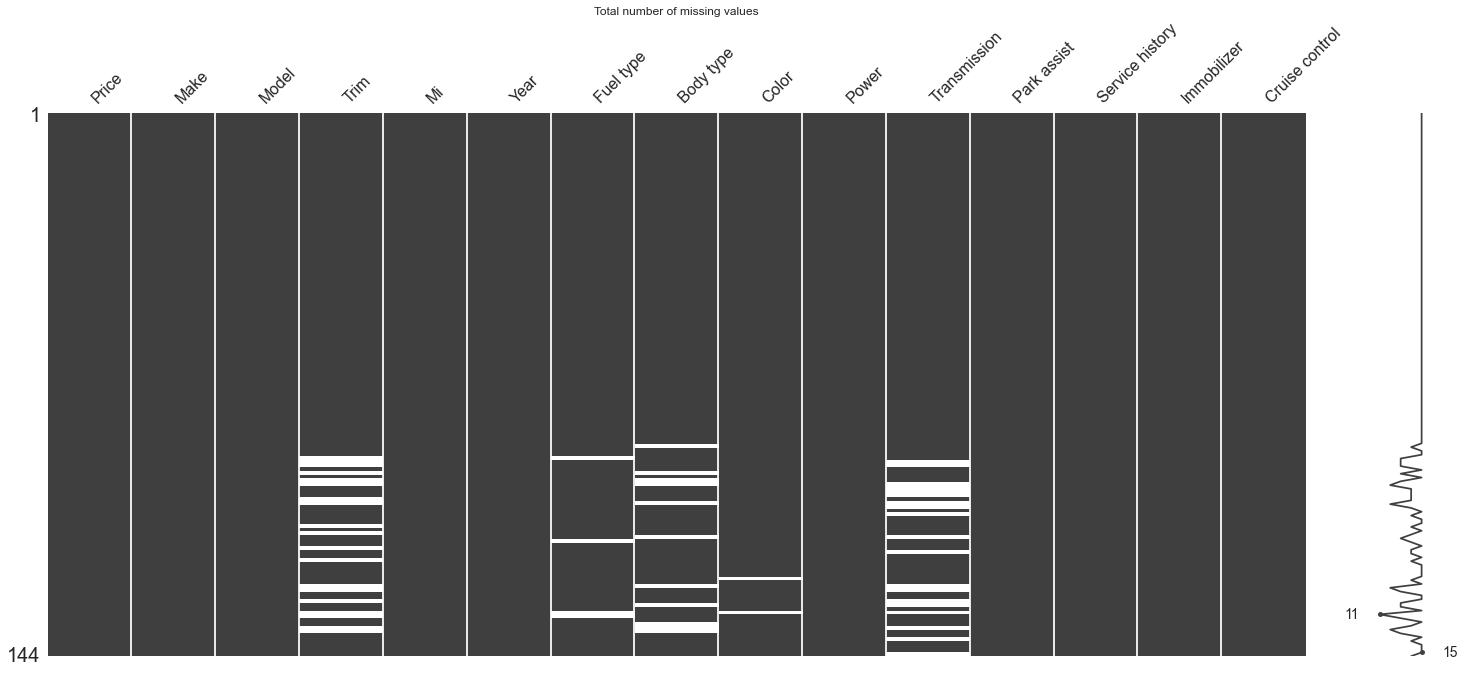

In [1181]:
msno.matrix(result)
plt.title("Total number of missing values")
plt.show()

From the matrix above we can clearly see that we have missing values in the following features: **Trim**, **Fuel type**, **Body type**, **Color** and **Transmission**.

In [1182]:
print("Number of rows where Trim is null:")
print(result['Trim'].isnull().sum())
print("Number of rows where Fuel type is null:")
print(result['Fuel type'].isnull().sum())
print("Number of rows where Body type is null:")
print(result['Body type'].isnull().sum())
print("Number of rows where Color is null:")
print(result['Color'].isnull().sum())
print("Number of rows where Transmission is null:")
print(result['Transmission'].isnull().sum())


Number of rows where Trim is null:
19
Number of rows where Fuel type is null:
4
Number of rows where Body type is null:
11
Number of rows where Color is null:
2
Number of rows where Transmission is null:
19


Filling the missing data with category which occurred most in each category.

#### 3.4.1 Dropping Trim

In [1183]:
result['Trim'].mode()

0    NaN
dtype: object

Having in mind that in this notebook we are interested mainly in the car brands, not the car trim (particular version of a model with a particular set of configuration). Using that we can drop the whole column **Trim** since its mode is *NaN*.

In [1184]:
result = result.drop(['Trim'], axis = 1)
result.head()

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
0,11233,Mercury,Grand Marquis,30577,1985,NaN,Sedan,Gray,87,Automatic,0,0,0,0
1,9129,Mercury,Grand Marquis,30577,1985,Petrol,NaN,Black,126,Automatic,0,0,0,0
2,3511,Mercury,Grand Marquis,69201,1985,Petrol,NaN,Gray,126,NaN,0,0,0,0
3,5958,Mercury,Grand Marquis Wagon,40064,1985,Petrol,NaN,Brown,126,NaN,0,0,0,0
4,4364,Subaru,Pleo L Limited,80467,1985,Petrol,Sedan,White,126,NaN,0,0,0,0


#### 3.4.2  Fuel type

The most common value for the attribute **Fuel type** in this dataset is *Petrol*, so we are going to replace the null values with it.

In [1185]:
mode_fueltype = result['Fuel type'].mode()
mode_fueltype

0    Petrol
dtype: object

In [1186]:
result['Fuel type'].unique()

array(['NaN', 'Petrol', 'Diesel', nan, 'Electric'], dtype=object)

In [1187]:
result['Fuel type'].unique()

array(['NaN', 'Petrol', 'Diesel', nan, 'Electric'], dtype=object)

In [1188]:
result['Fuel type'] = result['Fuel type'].str.replace('NaN', 'Petrol')
result['Fuel type'] = result['Fuel type'].fillna('Petrol')
result['Fuel type'].unique()

array(['Petrol', 'Diesel', 'Electric'], dtype=object)

In [1189]:
result['Fuel type'].unique()

array(['Petrol', 'Diesel', 'Electric'], dtype=object)

#### 3.4.3 Body type

Similar with the Fuel type, **Body type** does not play big role in this dataset, so we are going to replace the missing values with the most common. The most common value for the attribute **Body type** in this dataset is *Sedan*.

In [1190]:
result['Body type'].unique()

array(['Sedan', 'NaN', 'Cabrio', 'Coupe', 'Truck', 'Van', 'Small',
       'Convertible', 'N/A', nan], dtype=object)

In [1211]:
print("Number of cars that are Sedan: ")
print((result['Body type'] == 'Sedan').sum())
print("Number of cars that are Coupe: ")
print((result['Body type'] == 'Coupe').sum())
print("Number of cars that are Convertible: ")
print((result['Body type'] == 'Convertible').sum())
print("Number of cars that are Truck: ")
print((result['Body type'] == 'Truck').sum())
print("Number of cars that are Van: ")
print((result['Body type'] == 'Van').sum())
print("Number of cars that are Small: ")
print((result['Body type'] == 'Small').sum())


Number of cars that are Sedan: 
32
Number of cars that are Coupe: 
12
Number of cars that are Convertible: 
12
Number of cars that are Truck: 
3
Number of cars that are Van: 
2
Number of cars that are Small: 
1


We can see that most of the cars are Sedan, as Sedan is the most popular car body type in 1985. So, we are going to replace the null values with **Sedan**.

In [1192]:
result['Body type'].isnull().sum()

11

In [1212]:
result['Body type'].unique()

array(['Sedan', 'NaN', 'Convertible', 'Coupe', 'Truck', 'Van', 'Small',
       'N/A', nan], dtype=object)

In [1213]:
result['Body type'] = result['Body type'].str.replace('NaN', 'Sedan')
result['Body type'] = result['Body type'].str.replace('N/A', 'Sedan')
result['Body type'] = result['Body type'].fillna('Sedan')
result['Body type'].unique()

array(['Sedan', 'Convertible', 'Coupe', 'Truck', 'Van', 'Small'],
      dtype=object)

#### 3.4.4 Color

Replacing the 2 missing values with the mode of the column which is **White**.

In [1215]:
result['Color'].unique()

array(['Gray', 'Black', 'Brown', 'White', 'Blue', 'Red', 'Green',
       'Yellow', 'Pink', 'Purple', 'Orange', 'Silver', nan, 'Beige',
       'Gold'], dtype=object)

In [1216]:
result['Color'].isnull().sum()

2

In [1217]:
result['Color'].mode()

0    White
dtype: object

In [1218]:
result['Color'] = result['Color'].fillna('White')
result['Color'].unique()

array(['Gray', 'Black', 'Brown', 'White', 'Blue', 'Red', 'Green',
       'Yellow', 'Pink', 'Purple', 'Orange', 'Silver', 'Beige', 'Gold'],
      dtype=object)

In [1219]:
result['Color'].isnull().sum()

0

#### 3.4.5 Transmission

After some research on the internet and obviously clear, most of the vehicles' transmission in 1985 was Manual. So, we are going to replace the missing values with its mode - **Manual**.

In [1220]:
result['Transmission'].unique()

array(['Automatic', 'NaN', 'Manual', nan], dtype=object)

In [1221]:
result['Transmission'].mode()

0    Manual
dtype: object

In [1222]:
result['Transmission'].isnull().sum()

19

In [1223]:
result['Transmission'] = result['Transmission'].str.replace('NaN', 'Manual')
result['Transmission'] = result['Transmission'].fillna('Manual')
result['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [1224]:
result['Transmission'].isnull().sum()

0

#### 3.4.6 Mi

In [1228]:
result.loc[result['Mi'] == 0]

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
117,43800,Toyota,Land Cruiser,0,1985,Diesel,Sedan,Blue,126,Manual,0,0,0,0
142,11490,Toyota,Yaris,0,1985,Petrol,Sedan,Gray,126,Manual,0,0,0,0


In [1230]:
mi_mean = int(result['Mi'].mean())
mi_mean

149841

In [1232]:
indexes2 =  []
indexes2.append(result[result['Mi'] == 0].index)
indexes2



[Int64Index([117, 142], dtype='int64')]

In [1233]:
result.iloc[indexes2,[3]] = mi_mean

In [1234]:
result.loc[result['Mi'] == 0]

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control


### 3.5 Binary attributes

While scraping the data from the ooyyo.com website, we got attributes like Park assist, Service history, Immobilizer and Cruise control which are tipical for new cars. Particulary in this dataset we can see that these attributes are not relevant because such technology such as Park assist, Immobilizer (anti-theft) and Cruise control was very rare back then. <br>
Exception are two rows where in the first, Porsche made a car model *944* which had a **Immobilizer**. <br>
The second is Saab which made car model *900* that had a **Cruise control**.
Also, none of these cars that are selling now owns **Service history** card.

In [1240]:
result.loc[result['Immobilizer'] == 1]

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
104,14000,Porsche,944,135000,1985,Petrol,Coupe,Gray,121,Manual,0,0,1,0


In [1241]:
result.loc[result['Cruise control'] == 1]

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control
112,6950,Saab,900,225500,1985,Petrol,Sedan,Red,87,Manual,0,0,0,1


In [1238]:
result.loc[result['Park assist'] == 1]

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control


In [1239]:
result.loc[result['Service history'] == 1]

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Park assist,Service history,Immobilizer,Cruise control


Dropping columns **Park assist** and **Service history**.

In [1242]:
result = result.drop(['Park assist'], axis = 1)

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Service history,Immobilizer,Cruise control
0,11233,Mercury,Grand Marquis,30577,1985,Petrol,Sedan,Gray,87,Automatic,0,0,0
1,9129,Mercury,Grand Marquis,30577,1985,Petrol,Sedan,Black,126,Automatic,0,0,0
2,3511,Mercury,Grand Marquis,69201,1985,Petrol,Sedan,Gray,126,Manual,0,0,0
3,5958,Mercury,Grand Marquis Wagon,40064,1985,Petrol,Sedan,Brown,126,Manual,0,0,0
4,4364,Subaru,Pleo L Limited,80467,1985,Petrol,Sedan,White,126,Manual,0,0,0


In [1243]:
result = result.drop(['Service history'], axis = 1)
result.head()

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Immobilizer,Cruise control
0,11233,Mercury,Grand Marquis,30577,1985,Petrol,Sedan,Gray,87,Automatic,0,0
1,9129,Mercury,Grand Marquis,30577,1985,Petrol,Sedan,Black,126,Automatic,0,0
2,3511,Mercury,Grand Marquis,69201,1985,Petrol,Sedan,Gray,126,Manual,0,0
3,5958,Mercury,Grand Marquis Wagon,40064,1985,Petrol,Sedan,Brown,126,Manual,0,0
4,4364,Subaru,Pleo L Limited,80467,1985,Petrol,Sedan,White,126,Manual,0,0


## 4. Outliers

In [1235]:
result.describe()

,Price,Mi,Power,Park assist,Service history,Immobilizer,Cruise control
count,144.000000,144.000000,144.000000,144.0,144.0,144.000000,144.000000
mean,19966.611111,151922.131944,126.145833,0.0,0.0,0.006944,0.006944
std,44583.613011,122245.329656,30.118639,0.0,0.0,0.083333,0.083333
min,1099.000000,96.000000,53.000000,0.0,0.0,0.000000,0.000000
25%,4925.000000,86368.750000,126.000000,0.0,0.0,0.000000,0.000000
50%,10016.500000,131871.500000,126.000000,0.0,0.0,0.000000,0.000000
75%,21992.500000,195625.000000,126.000000,0.0,0.0,0.000000,0.000000
max,499000.000000,999999.000000,265.000000,0.0,0.0,1.000000,1.000000


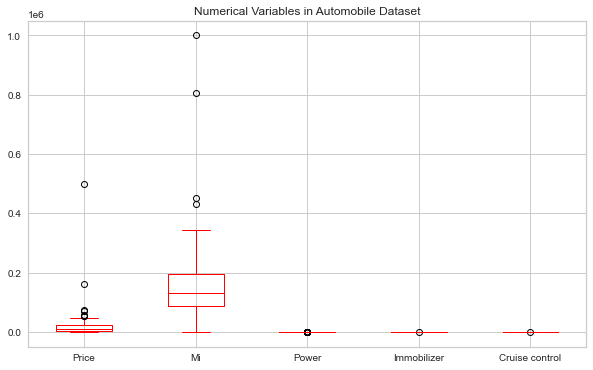

In [1246]:
plt.figure(figsize=(10,6))
plt.title("Numerical Variables in Automobile Dataset")
result[['Price', 'Mi', 'Power', 'Immobilizer','Cruise control']].boxplot(color='red')
plt.show()

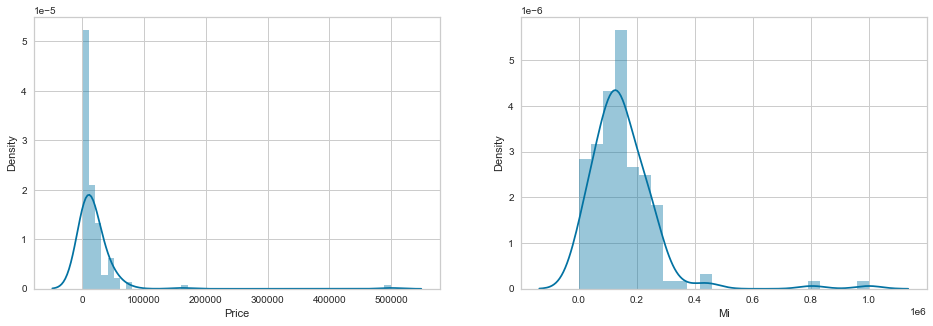

In [1264]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(result['Price'])
plt.subplot(1,2,2)
sns.distplot(result['Mi'])
plt.show()

In [1284]:
droped = result.copy()
droped

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Immobilizer,Cruise control
0,11233,Mercury,Grand Marquis,30577,1985,Petrol,Sedan,Gray,87,Automatic,0,0
1,9129,Mercury,Grand Marquis,30577,1985,Petrol,Sedan,Black,126,Automatic,0,0
2,3511,Mercury,Grand Marquis,69201,1985,Petrol,Sedan,Gray,126,Manual,0,0
3,5958,Mercury,Grand Marquis Wagon,40064,1985,Petrol,Sedan,Brown,126,Manual,0,0
4,4364,Subaru,Pleo L Limited,80467,1985,Petrol,Sedan,White,126,Manual,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
139,44900,Mercedes Benz,Sl-Class,139000,1985,Petrol,Convertible,Blue,180,Manual,0,0
140,12949,Audi,A1,124649,1985,Petrol,Sedan,Black,136,Automatic,0,0
141,75000,Porsche,911,150000,1985,Petrol,Coupe,Gold,172,Manual,0,0
142,11490,Toyota,Yaris,149841,1985,Petrol,Sedan,Gray,126,Manual,0,0


### 4.1 Price outliers

In [1267]:
print("Highest allowed",result['Price'].mean() + 3*result['Price'].std())
print("Lowest allowed",result['Price'].mean() - 3*result['Price'].std())

Highest allowed 153717.45014430716
Lowest allowed -113784.22792208493


In [1270]:
result[(result['Price'] > 153717) | (result['Price'] < -113784)]

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Immobilizer,Cruise control
47,161000,Renault,R5,60565,1985,Petrol,Sedan,Black,126,Manual,0,0
143,499000,Audi,Quattro,53659,1985,Petrol,Coupe,Red,126,Manual,0,0


In [1291]:
result['Price'].loc[(result['Price'] > 153717)] =  result['Price'].mean()

### 4.2 Mi outliers

In [1271]:
print("Highest allowed",result['Mi'].mean() + 3*result['Mi'].std())
print("Lowest allowed",result['Mi'].mean() - 3*result['Mi'].std())

Highest allowed 518658.120912771
Lowest allowed -214813.8570238821


In [1288]:
result[(result['Mi'] > 518658) | (result['Mi'] < -213813)]

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Immobilizer,Cruise control
14,5167,Honda,Civic Si,804672,1985,Petrol,Sedan,Blue,126,Manual,0,0
31,2750,Chevrolet,Caprice,999999,1985,Petrol,Sedan,White,126,Automatic,0,0


In [1292]:
result['Mi'].loc[(result['Mi'] > 518658)] =  result['Mi'].mean()

### 4.3 Power outliers

<AxesSubplot:xlabel='Power', ylabel='Density'>

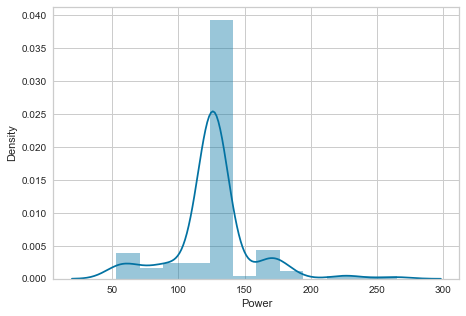

In [1273]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(result['Power'])

In [1274]:
print("Highest allowed",result['Power'].mean() + 3*result['Power'].std())
print("Lowest allowed",result['Power'].mean() - 3*result['Power'].std())

Highest allowed 216.5017510732875
Lowest allowed 35.78991559337918


In [1276]:
result[(result['Power'] > 216) | (result['Power'] < 35)]

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Immobilizer,Cruise control
90,19990,Mercedes Benz,S-Class,126879,1985,Petrol,Sedan,Green,265,Automatic,0,0
123,8650,Jaguar,Xj,112853,1985,Petrol,Sedan,White,223,Automatic,0,0
131,23524,Porsche,928,180950,1985,Petrol,Coupe,Beige,231,Automatic,0,0


In [1]:
result['Power'].loc[(result['Power'] > 216)] =  result['Power'].mean()

NameError: name 'result' is not defined

## 5. EDA

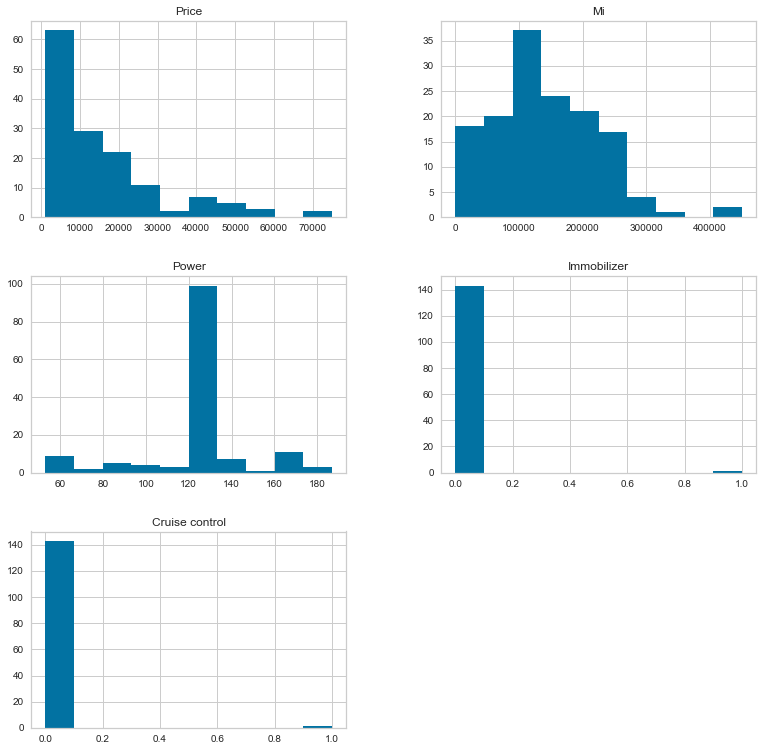

In [1294]:
result.hist(figsize=(13,13))
plt.show()

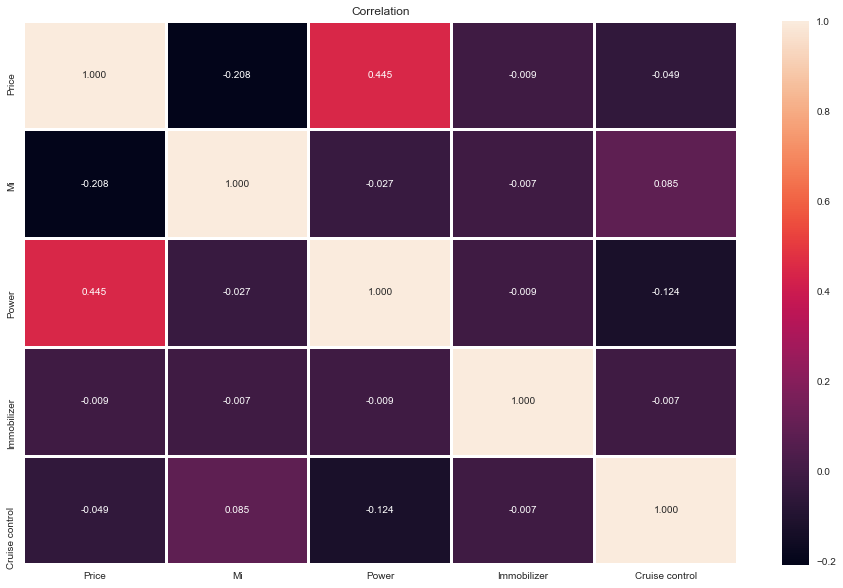

In [1311]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.heatmap(result.corr(), annot=True, fmt='.3f', linewidths=2)
plt.title('Correlation')
plt.show()

From the correlation heatmap we can see that **Power** has positive correlation index with **Price** and **Mileage** has slightly opposite correlation with **Price**.

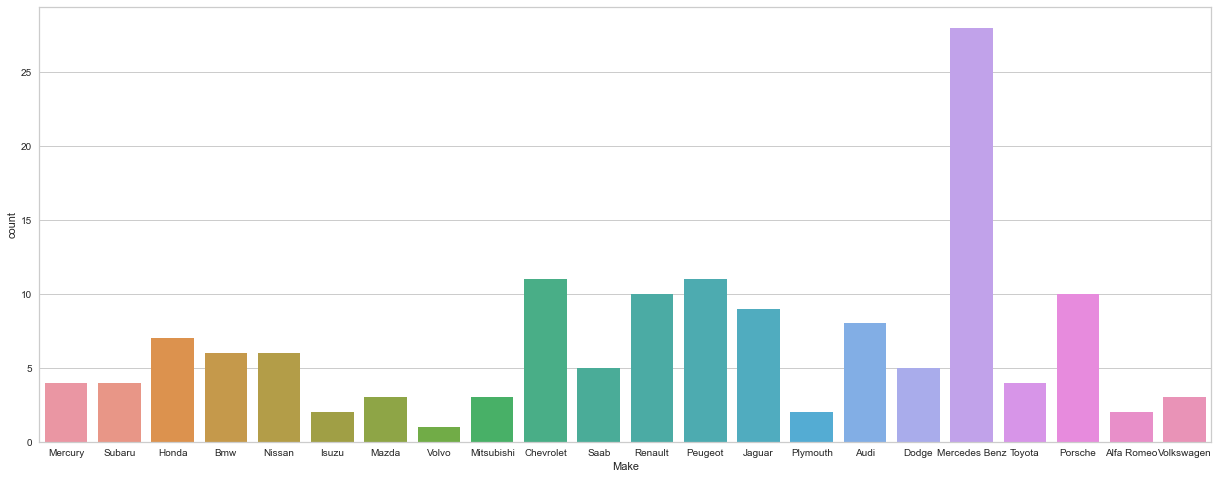

In [1316]:
plt.figure(figsize=(21,8))
sns.countplot(data=result,x='Make');

As we mentioned before, the main goal of this notebook is to analyse the  today's **Price** of the cars from 1985. <br>
So we will find some interesting informations about the price. :)

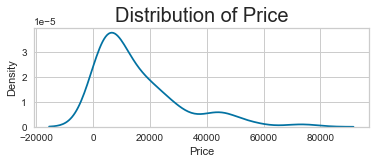

In [1317]:
plt.subplot(2,1,1)
plt.title('Distribution of Price', fontsize=20)
sns.kdeplot(result['Price'])
plt.show()

The distribution of the target variable **Price** is positively skewed. We need to handle this in order to have better predictions later.

Price correlation with Mileage


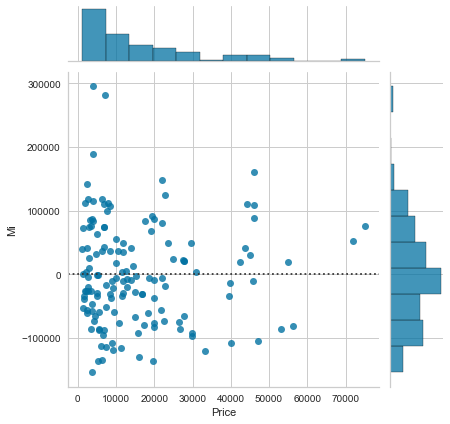

In [1319]:
sns.jointplot(data=result, x="Price", y="Mi", kind="resid")
print("Price correlation with Mileage")

plt.show()

In [1327]:
result['Body type'].unique()

array(['Sedan', 'Convertible', 'Coupe', 'Truck', 'Van', 'Small'],
      dtype=object)

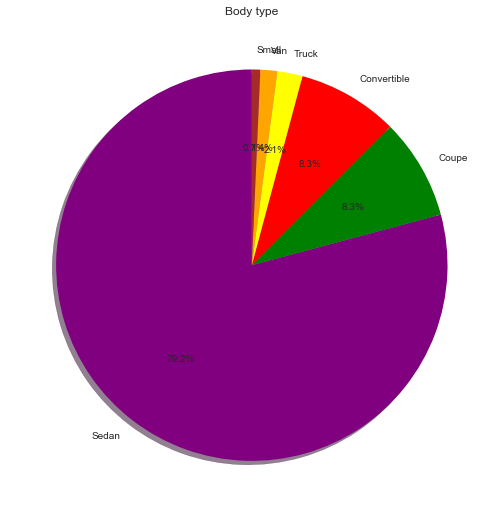

In [1334]:
labels = result['Body type'].value_counts(sort = True).index
sizes = result['Body type'].value_counts(sort = True)

colors = ["purple","green","red","yellow","orange","brown"]
 
plt.figure(figsize=(9,9))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Body type')
plt.show()

In [1336]:
result['Price'].min()

1099

In [1337]:
result['Price'].max()

75000

In [1339]:
result['Price'].describe()

count      144.000000
mean     15660.583333
std      15007.564070
min       1099.000000
25%       4925.000000
50%      10016.500000
75%      21773.000000
max      75000.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Make', ylabel='Price'>

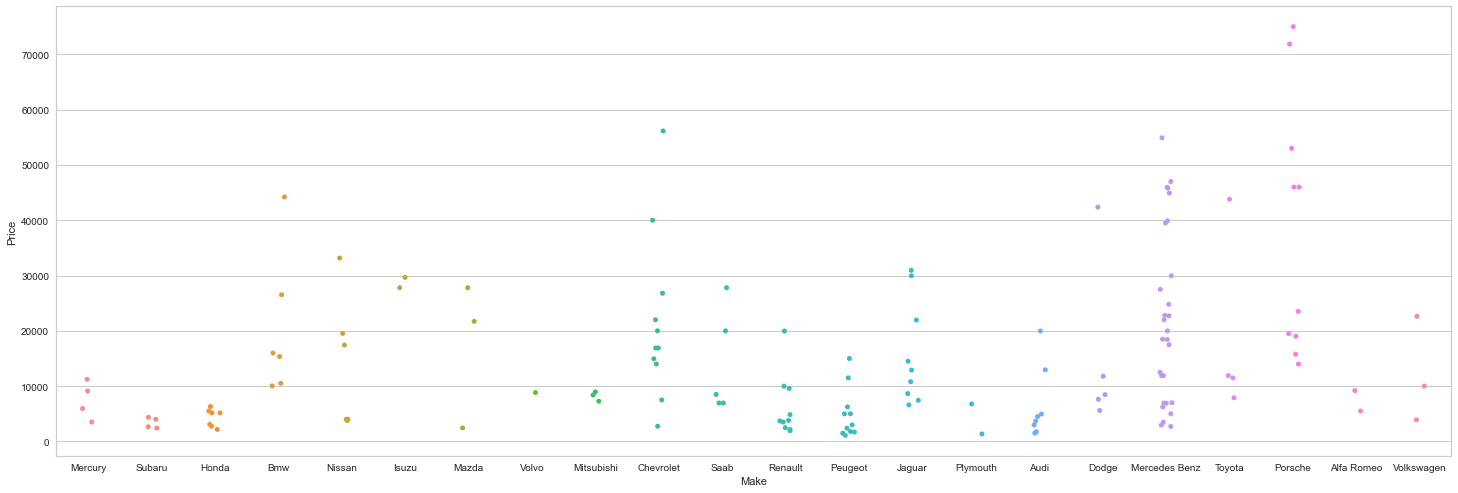

In [1326]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8.27)
sns.stripplot(x = 'Make', y ='Price', data = result)

<AxesSubplot:xlabel='Fuel type', ylabel='Price'>

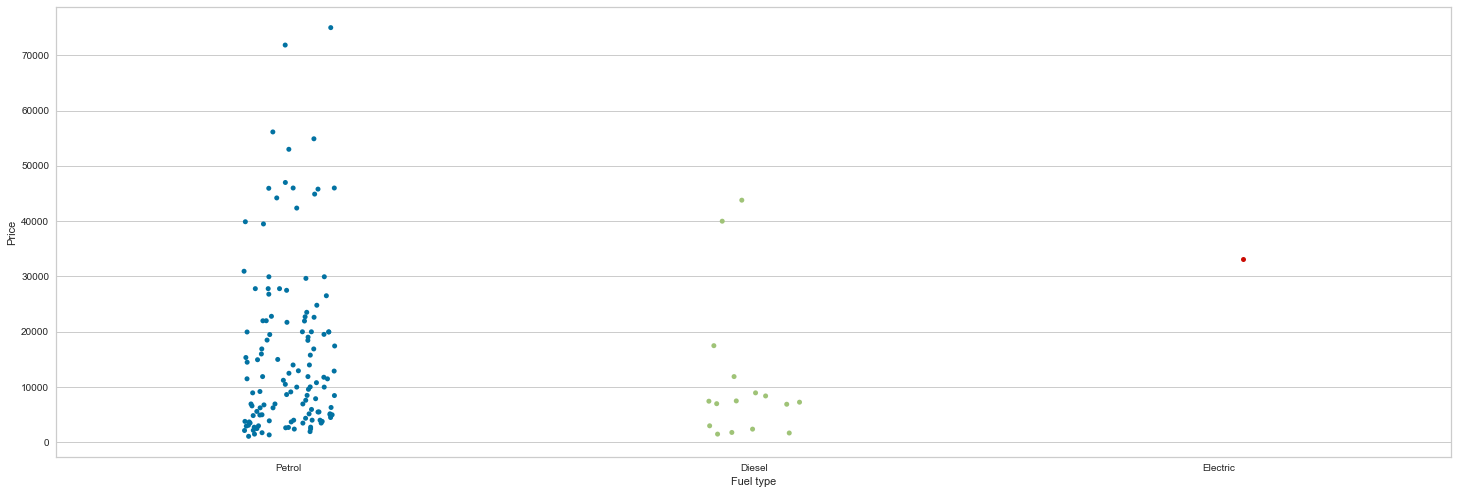

In [1341]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8.27)
sns.stripplot(x = 'Fuel type', y ='Price', data = result)

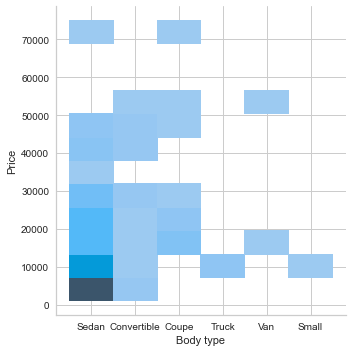

In [1368]:
sns.displot(result, x="Body type", y="Price")


## 6. Handling the positive skewness of the target variable - Price

In [1426]:
novoo = result.copy()

Skew:  1.612712737249551
Kurtosis: 2.5237103264537817


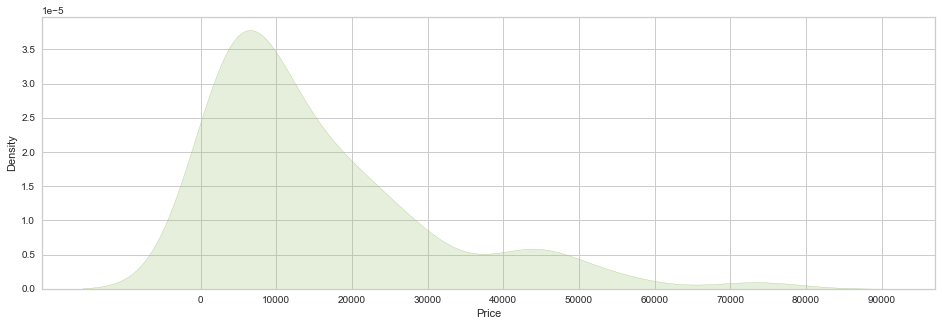

In [1439]:
#Price positive skewness
plt.figure(figsize=(16,5))
print("Skew:  {}".format(result['Price'].skew()))
print("Kurtosis: {}".format(result['Price'].kurtosis())) 
ax  =  sns.kdeplot(result['Price'],shade=True,color='g')
plt.xticks([i  for  i  in  range(0,100000,10000)]) 
plt.show()


In [1354]:
novskew = result.copy()

In [1440]:
# Reducing the Right (Positive) Skewness of the Area using log(n) + 1
result['Price']  =  np.log(result['Price']  +  1)

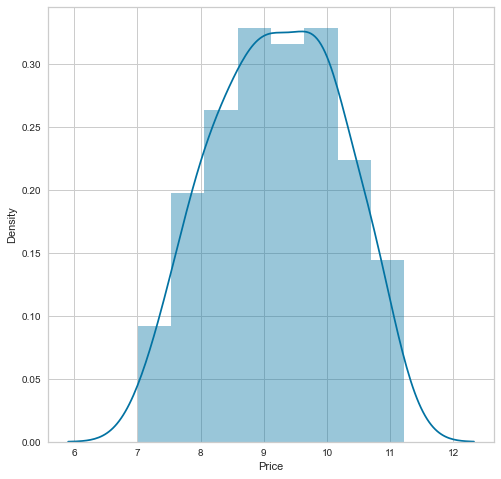

In [1441]:
# Skewness of the Area in the dataset
plt.rcParams['figure.figsize']=[8,  8] 
sns.distplot(result['Price']);

Skew:  -0.08046196087161094
Kurtosis: -0.8237022753916126


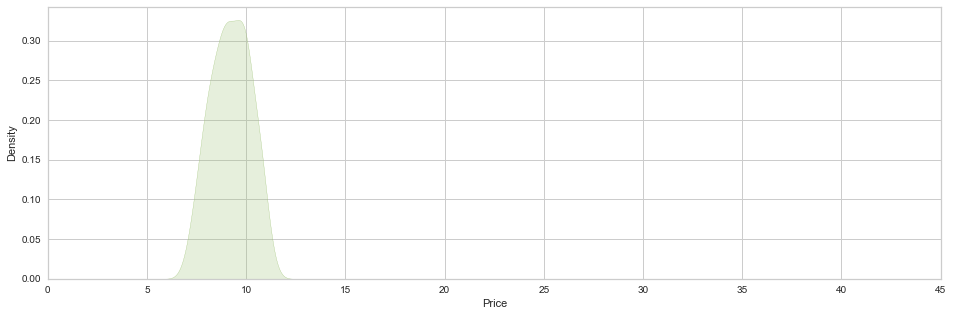

In [1442]:
#Price positive skewness
plt.figure(figsize=(16,5))
print("Skew:  {}".format(result['Price'].skew()))
print("Kurtosis: {}".format(result['Price'].kurtosis())) 
ax  =  sns.kdeplot(result['Price'],shade=True,color='g')
plt.xticks([i  for  i  in  range(0,50,5)]) 
plt.show()


## 7. Regression models

### 7.1 Detecting multicolinearity with PCA

In [1443]:
encoded = result.copy()

In [1444]:
encoded.head()

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Immobilizer,Cruise control
0,9.326700,Mercury,Grand Marquis,30577,1985,Petrol,Sedan,Gray,87,Automatic,0,0
1,9.119321,Mercury,Grand Marquis,30577,1985,Petrol,Sedan,Black,126,Automatic,0,0
2,8.163941,Mercury,Grand Marquis,69201,1985,Petrol,Sedan,Gray,126,Manual,0,0
3,8.692658,Mercury,Grand Marquis Wagon,40064,1985,Petrol,Sedan,Brown,126,Manual,0,0
4,8.381373,Subaru,Pleo L Limited,80467,1985,Petrol,Sedan,White,126,Manual,0,0


In [1445]:
labelencoder = LabelEncoder()



cat_attributes = ['Make', 'Model', 'Fuel type', 'Body type', 'Color', 'Transmission']

for ca in cat_attributes:
    encoded[ca] = labelencoder.fit_transform(encoded[ca])
    
encoded.head()

,Price,Make,Model,Mi,Year,Fuel type,Body type,Color,Power,Transmission,Immobilizer,Cruise control
0,9.326700,10,43,30577,1985,2,2,5,87,0,0,0
1,9.119321,10,43,30577,1985,2,2,1,126,0,0,0
2,8.163941,10,43,69201,1985,2,2,5,126,1,0,0
3,8.692658,10,44,40064,1985,2,2,3,126,1,0,0
4,8.381373,18,55,80467,1985,2,2,12,126,1,0,0


In [1446]:
X = encoded[atr]
y = encoded['Price']

In [1447]:
X = MinMaxScaler().fit_transform(X)

In [1448]:
atr = ['Make', 'Model', 'Fuel type', 'Body type', 'Color', 'Transmission','Mi','Year','Power','Immobilizer','Cruise control']

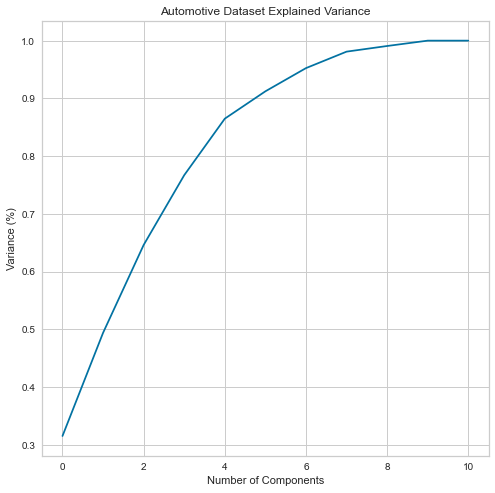

In [1449]:
pca = PCA().fit(X)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Automotive Dataset Explained Variance')
plt.show()

In words, 5 attributes explain about 90% of the variance.

#### Splitting into train and test sets

In [1455]:
target = encoded['Price']
features = encoded.drop(columns = 'Price')

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 195)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (115, 11)
Test data set size :  (29, 11)


#### Scaling (Normalization)

In [1456]:
# Normalization
minmax = MinMaxScaler() 

minmax.fit(X_train)

X_train = minmax.transform(X_train) 
X_test = minmax.transform(X_test)


In [1452]:
pca_2D = PCA(n_components=2)
X_train = pca_2D.fit_transform(X_train)
X_test = pca_2D.transform(X_test)

<Figure size 576x576 with 0 Axes>

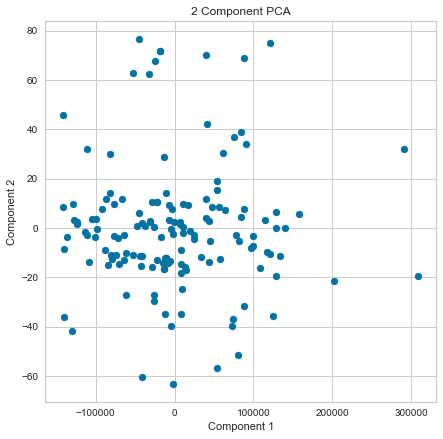

In [1453]:
#2D PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(encoded)

PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )

plt.figure()
plt.figure(figsize=(7,7))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])

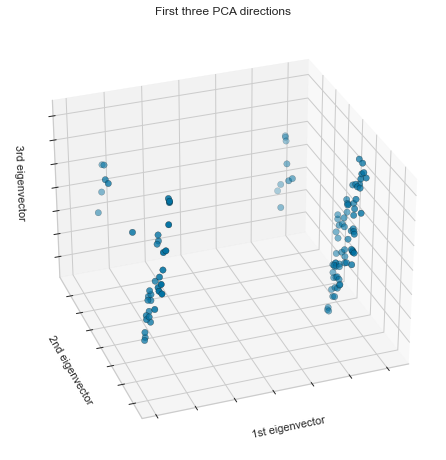

In [1457]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

pca = PCA(n_components=3)
X_reduced = pca.fit(X_train).transform(X_train) 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

###  7.2 Models

In [1459]:
results_mse=[]
results_r2=[]
results_mae=[]

### Linear Regression

In [1461]:
lr = LinearRegression() 
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("Linear Regression R^2:  {:.5f}".format(lr.score(X_test, y_test)))



MAE: 0.7442469460040176
MSE: 0.8146192030338995
Linear Regression R^2:  0.16753


### Random Forest Regressor

In [1462]:
rf = RandomForestRegressor() 
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("Random Forest Regressor R^2:  {:.5f}".format(rf.score(X_test, y_test)))



MAE: 0.6572368496316225
MSE: 0.5793142428347038
Random Forest Regressor R^2:  0.40799


### SVR

In [1466]:
svr = SVR() 
svr.fit(X_train,y_train)
pred = svr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("SVR R^2:  {:.5f}".format(svr.score(X_test, y_test)))



MAE: 0.7682546495408853
MSE: 0.7975749768844871
SVR R^2:  0.18495


### Bayesian Ridge Regression

In [1464]:
br = BayesianRidge() 
br.fit(X_train,y_train)
pred = br.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("Bayesian Regression R^2:  {:.5f}".format(br.score(X_test, y_test)))



MAE: 0.7764590986841434
MSE: 0.8565722806295037
Bayesian Regression R^2:  0.12466
